In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#url of the dataset

train_df = pd.read_excel("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Restaurant%20Food%20Cost/Data_Train.xlsx")


test_df=pd.read_excel("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Restaurant%20Food%20Cost/Data_Test.xlsx")
test_df


TITLE  RESTAURANT_ID  \
0     CASUAL DINING           4085   
1       QUICK BITES          12680   
2     CASUAL DINING           1411   
3              None            204   
4       QUICK BITES          13453   
...             ...            ...   
4226  CASUAL DINING           9057   
4227           None           1247   
4228    QUICK BITES           8617   
4229    QUICK BITES           6485   
4230    QUICK BITES           2421   

                                           CUISINES  \
0             North Indian, Chinese, Mughlai, Kebab   
1      South Indian, Fast Food, Pizza, North Indian   
2           North Indian, Seafood, Biryani, Chinese   
3                                           Biryani   
4                              South Indian, Kerala   
...                                             ...   
4226                 North Indian, Mughlai, Chinese   
4227  Biryani, North Indian, Sandwich, Salad, Wraps   
4228                      Continental, North Indian   
4229                               Rolls, Beverages   
4230                                        Mughlai   

                                                   TIME         CITY  \
0                         12noon – 12midnight (Mon-Sun)        Noida   
1                               7am – 12:30AM (Mon-Sun)       Mumbai   
2                              11am – 11:30pm (Mon-Sun)       Mumbai   
3     9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...    Faridabad   
4                                 11am – 10pm (Mon-Sun)        Kochi   
...                                                 ...          ...   
4226                        11:30am – 11:30pm (Mon-Sun)    New Delhi   
4227                               11am – 1am (Mon-Sun)    Bangalore   
4228                         9:30am – 10:30pm (Mon-Sun)    Faridabad   
4229  11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...        Kochi   
4230                                5pm – 1am (Mon-Sun)  Bandra West   

              LOCALITY RATING       VOTES  
0            Sector 18    4.3   564 votes  
1           Grant Road    4.2    61 votes  
2         Marine Lines    3.8   350 votes  
3                  NIT    3.8  1445 votes  
4               Kaloor    3.6    23 votes  
...                ...    ...         ...  
4226      Punjabi Bagh    3.9   287 votes  
4227        HSR Layout    4.3   469 votes  
4228         Sector 86    3.7    53 votes  
4229             Kochi      -         NaN  
4230  Perry Cross Road    3.7    63 votes  

[4231 rows x 8 columns]

# Exploratory Data Analysis (EDA)

In [3]:
train_df.shape

(12690, 9)

The Train Dataset contain 12690 rows and 9 columns

In [4]:
test_df.shape

(4231, 8)

The Test Dataset contain 4231 rows and 8 columns

In [5]:
train_df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [6]:
test_df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [7]:
#checking the datatypes of train table columns
train_df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

Here only 2 numerical columns are present as int64 and 7 object or string in dataset

In [8]:
#checking the datatypes of test table columns
test_df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [9]:
train_df.head()

TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lower Parel    3.8   

       VOTES  COST  
0   49 votes  1200  
1   30 votes  1500  
2  221 votes   800  
3   24 votes   800  
4  165 votes   300

In [10]:
train_df.tail(15)

TITLE  RESTAURANT_ID  \
12675           CASUAL DINING           2029   
12676             QUICK BITES          13369   
12677                    None          14196   
12678          DESSERT PARLOR          14003   
12679             QUICK BITES           6648   
12680             QUICK BITES          13798   
12681                    CAFÉ           3241   
12682             QUICK BITES           8085   
12683  QUICK BITES,SWEET SHOP           5430   
12684           CASUAL DINING           8324   
12685             QUICK BITES          13228   
12686       CASUAL DINING,BAR           9686   
12687                  LOUNGE          11133   
12688           CASUAL DINING           6134   
12689           CASUAL DINING           6430   

                                               CUISINES  \
12675                       Salad, Healthy Food, Juices   
12676                                      North Indian   
12677                                             Rolls   
12678                               Ice Cream, Desserts   
12679                            Italian, Mediterranean   
12680                 North Indian, Fast Food, Desserts   
12681                           Beverages, Cafe, Bakery   
12682                                         Fast Food   
12683   North Indian, South Indian, Street Food, Mithai   
12684                             North Indian, Chinese   
12685                       North Indian, Burger, Kebab   
12686                                 Goan, Continental   
12687          Finger Food, Continental, Asian, Chinese   
12688  North Indian, South Indian, Chinese, Street Food   
12689                             North Indian, Chinese   

                                                   TIME         CITY  \
12675                        12noon – 10:30pm (Mon-Sun)  Bandra West   
12676         11:30am – 4:30pm, 7pm – 11:30pm (Mon-Sun)    New Delhi   
12677                           11am – 4:30am (Mon-Sun)       Mumbai   
12678                       10:30am – 11:30pm (Mon-Sun)      Chennai   
12679                        12:30pm – 9:45pm (Mon-Sun)      Gurgaon   
12680                             10am – 11pm (Mon-Sun)    New Delhi   
12681                             11am – 11pm (Mon-Sun)        Noida   
12682                             11am – 11pm (Mon-Sun)     Chennai.   
12683                           8:30am – 11pm (Mon-Sun)    New Delhi   
12684                             11am – 11pm (Mon-Sun)    New Delhi   
12685  12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...    Hyderabad   
12686   12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...       Mumbai   
12687                        12noon – 12:30AM (Mon-Sun)  Navi Mumbai   
12688                           6am – 10:45pm (Mon-Sun)      Chennai   
12689                          12:30pm – 11pm (Mon-Sun)    Hyderabad   

                   LOCALITY RATING       VOTES  COST  
12675          Linking Road    4.5  2723 votes   900  
12676            Karol Bagh    3.7   326 votes   350  
12677             Mahalaxmi    4.0   123 votes   550  
12678       Anna Nagar East    3.9    59 votes   350  
12679           DLF Phase 3    4.3    68 votes   650  
12680    Near Malviya Nagar    3.4    13 votes   300  
12681             Sector 18    4.1   300 votes   450  
12682             Mogappair    3.6    30 votes   450  
12683             Pitampura    4.1  1426 votes   500  
12684            Moti Nagar    3.8   492 votes   550  
12685            Gachibowli    3.8   546 votes   500  
12686  Bandra Kurla Complex    4.3  1214 votes  1800  
12687                 Vashi    4.0   608 votes  1300  
12688           Maduravoyal    3.5    32 votes   400  
12689       Vanasthalipuram    3.4   677 votes   600

In [11]:
test_df.head()

TITLE  RESTAURANT_ID                                      CUISINES  \
0  CASUAL DINING           4085         North Indian, Chinese, Mughlai, Kebab   
1    QUICK BITES          12680  South Indian, Fast Food, Pizza, North Indian   
2  CASUAL DINING           1411       North Indian, Seafood, Biryani, Chinese   
3           None            204                                       Biryani   
4    QUICK BITES          13453                          South Indian, Kerala   

                                                TIME       CITY      LOCALITY  \
0                      12noon – 12midnight (Mon-Sun)      Noida     Sector 18   
1                            7am – 12:30AM (Mon-Sun)     Mumbai    Grant Road   
2                           11am – 11:30pm (Mon-Sun)     Mumbai  Marine Lines   
3  9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...  Faridabad           NIT   
4                              11am – 10pm (Mon-Sun)      Kochi        Kaloor   

  RATING       VOTES  
0    4.3   564 votes  
1    4.2    61 votes  
2    3.8   350 votes  
3    3.8  1445 votes  
4    3.6    23 votes

In [12]:
test_df.tail()

TITLE  RESTAURANT_ID  \
4226  CASUAL DINING           9057   
4227           None           1247   
4228    QUICK BITES           8617   
4229    QUICK BITES           6485   
4230    QUICK BITES           2421   

                                           CUISINES  \
4226                 North Indian, Mughlai, Chinese   
4227  Biryani, North Indian, Sandwich, Salad, Wraps   
4228                      Continental, North Indian   
4229                               Rolls, Beverages   
4230                                        Mughlai   

                                                   TIME         CITY  \
4226                        11:30am – 11:30pm (Mon-Sun)    New Delhi   
4227                               11am – 1am (Mon-Sun)    Bangalore   
4228                         9:30am – 10:30pm (Mon-Sun)    Faridabad   
4229  11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...        Kochi   
4230                                5pm – 1am (Mon-Sun)  Bandra West   

              LOCALITY RATING      VOTES  
4226      Punjabi Bagh    3.9  287 votes  
4227        HSR Layout    4.3  469 votes  
4228         Sector 86    3.7   53 votes  
4229             Kochi      -        NaN  
4230  Perry Cross Road    3.7   63 votes

# np.nan,None,NaN,others

In [13]:
#Checking the null value in the dataset
train_df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [14]:
test_df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [15]:
# checking the total value present in dataset 
train_df.isnull().sum().sum()

1416

In [16]:
test_df.isnull().sum().sum()

469

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


<Axes: >

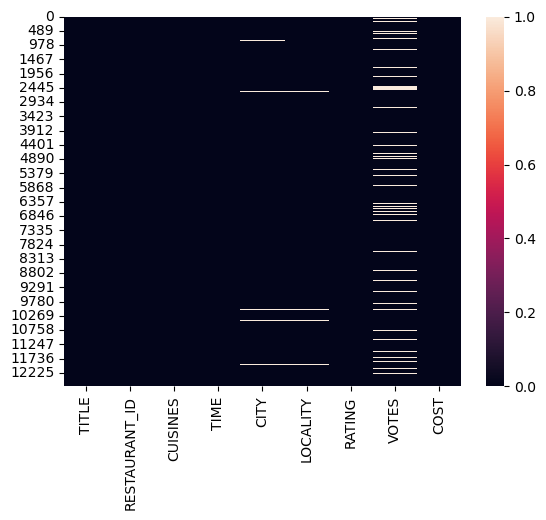

In [19]:
#lets visualize it using heatmap
sns.heatmap(train_df.isnull())

<Axes: >

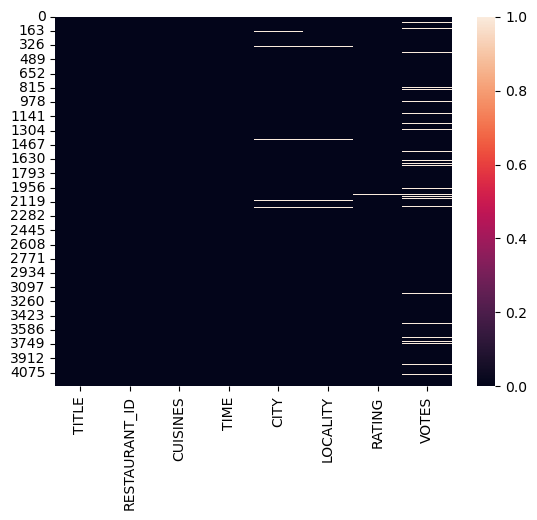

In [20]:
#lets visualize it using heatmap
sns.heatmap(test_df.isnull())

In [21]:
# checking the unique value 
train_df["VOTES"].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [22]:
test_df["VOTES"].unique()

array(['564 votes', '61 votes', '350 votes', ..., '1697 votes',
       '749 votes', '1239 votes'], dtype=object)

In [23]:
# checking the unique value COUNT
train_df["VOTES"].nunique()

1847

In [24]:
train_df["VOTES"].mode()

0    44 votes
Name: VOTES, dtype: object

In [25]:
#Checking the value count of each variabe in the table

for i in train_df:
    print(train_df[i].value_counts())
    print("\n")

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
QUICK BITES,BAR                1
MEAT SHOP                      1
SWEET SHOP,CONFECTIONERY       1
BEVERAGE SHOP,FOOD COURT       1
BAR,MICROBREWERY               1
Name: TITLE, Length: 113, dtype: int64


7264     8
4634     7
9910     6
11971    5
12747    5
        ..
9069     1
6573     1
7430     1
6381     1
6134     1
Name: RESTAURANT_ID, Length: 11892, dtype: int64


South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, Euro

In [26]:
#Checking the value count of each variabe in the table

for i in test_df:
    print(test_df[i].value_counts())
    print("\n")

QUICK BITES                   1416
CASUAL DINING                 1258
None                           284
CAFÉ                           223
DESSERT PARLOR                 126
                              ... 
CASUAL DINING,LOUNGE             1
CLUB,FINE DINING                 1
SWEET SHOP,DESSERT PARLOR        1
COCKTAIL BAR,CASUAL DINING       1
BHOJANALYA                       1
Name: TITLE, Length: 86, dtype: int64


15454    3
12799    3
7656     3
1619     3
11169    3
        ..
4318     1
636      1
7425     1
3631     1
2421     1
Name: RESTAURANT_ID, Length: 4127, dtype: int64


North Indian, Chinese                                 213
North Indian                                          190
South Indian                                          174
Fast Food                                              78
Chinese                                                59
                                                     ... 
South Indian, Kerala, Chinese, North Indian             

In [27]:
#Filling Null value after converting data structure for vote and rating column

train_df['RATING'] = train_df['RATING'].str.replace('NEW', '1')
train_df['RATING'] = train_df['RATING'].str.replace('-', '1').astype(float)

In [28]:
#Filling Null value after converting data structure for vote and rating column

test_df['RATING'] = test_df['RATING'].str.replace('NEW', '1')
test_df['RATING'] = test_df['RATING'].str.replace('-', '1').astype(float)

In [29]:
train_df['VOTES'] = train_df['VOTES'].str.replace(' votes', '').astype(float)

In [30]:
test_df['VOTES'] = test_df['VOTES'].str.replace(' votes', '').astype(float)

Can also drop column restaurant id  as its length is equal to column of dataset and as not such importance to the target.

Aslo noted TIME column in the object need to change in datatime format for better analysis but there is not as much reference because all the value contains 7 days open with time slot will be using label encoder as query for this cost prediction regression model require to change the table in desired features structure as numeric variable

In [31]:
train_df.drop("RESTAURANT_ID",axis=1,inplace=True)

In [32]:
test_df.drop("RESTAURANT_ID",axis=1,inplace=True)

In [33]:
#Its ideal to drop rows with missing value in this scenario bec missing value total count is 1416 

In [34]:
#df.dropna(axis=0,inplace=True)

# Feature Engineering

In [35]:
train_df["RATING"].mean()

3.5215715636822194

In [36]:
train_df["RATING"].fillna(3.5,inplace=True)

In [37]:
train_df["VOTES"].mode()

0    44.0
Name: VOTES, dtype: float64

In [38]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

for i in train_df:
    train_df[i]=imp.fit_transform(train_df[i].values.reshape(-1,1))

    
train_df

TITLE                                          CUISINES  \
0          CASUAL DINING                       Malwani, Goan, North Indian   
1      CASUAL DINING,BAR                    Asian, Modern Indian, Japanese   
2          CASUAL DINING        North Indian, Chinese, Biryani, Hyderabadi   
3            QUICK BITES                                  Tibetan, Chinese   
4         DESSERT PARLOR                                          Desserts   
...                  ...                                               ...   
12685        QUICK BITES                       North Indian, Burger, Kebab   
12686  CASUAL DINING,BAR                                 Goan, Continental   
12687             LOUNGE          Finger Food, Continental, Asian, Chinese   
12688      CASUAL DINING  North Indian, South Indian, Chinese, Street Food   
12689      CASUAL DINING                             North Indian, Chinese   

                                                   TIME         CITY  \
0                11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)        Thane   
1                                  6pm – 11pm (Mon-Sun)      Chennai   
2                   11am – 3:30pm, 7pm – 11pm (Mon-Sun)      Chennai   
3                               11:30am – 1am (Mon-Sun)       Mumbai   
4                                  11am – 1am (Mon-Sun)       Mumbai   
...                                                 ...          ...   
12685  12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...    Hyderabad   
12686   12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...       Mumbai   
12687                        12noon – 12:30AM (Mon-Sun)  Navi Mumbai   
12688                           6am – 10:45pm (Mon-Sun)      Chennai   
12689                          12:30pm – 11pm (Mon-Sun)    Hyderabad   

                   LOCALITY  RATING   VOTES  COST  
0            Dombivali East     3.6    49.0  1200  
1                 Ramapuram     4.2    30.0  1500  
2                Saligramam     3.8   221.0   800  
3               Bandra West     4.1    24.0   800  
4               Lower Parel     3.8   165.0   300  
...                     ...     ...     ...   ...  
12685            Gachibowli     3.8   546.0   500  
12686  Bandra Kurla Complex     4.3  1214.0  1800  
12687                 Vashi     4.0   608.0  1300  
12688           Maduravoyal     3.5    32.0   400  
12689       Vanasthalipuram     3.4   677.0   600  

[12690 rows x 8 columns]

In [39]:
test_df["RATING"].mean()

3.5184440766138567

In [40]:
test_df["RATING"].fillna(3.5,inplace=True)

In [41]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

for p in test_df:
    test_df[p]=imp.fit_transform(test_df[p].values.reshape(-1,1))

    
test_df

TITLE                                       CUISINES  \
0     CASUAL DINING          North Indian, Chinese, Mughlai, Kebab   
1       QUICK BITES   South Indian, Fast Food, Pizza, North Indian   
2     CASUAL DINING        North Indian, Seafood, Biryani, Chinese   
3              None                                        Biryani   
4       QUICK BITES                           South Indian, Kerala   
...             ...                                            ...   
4226  CASUAL DINING                 North Indian, Mughlai, Chinese   
4227           None  Biryani, North Indian, Sandwich, Salad, Wraps   
4228    QUICK BITES                      Continental, North Indian   
4229    QUICK BITES                               Rolls, Beverages   
4230    QUICK BITES                                        Mughlai   

                                                   TIME         CITY  \
0                         12noon – 12midnight (Mon-Sun)        Noida   
1                               7am – 12:30AM (Mon-Sun)       Mumbai   
2                              11am – 11:30pm (Mon-Sun)       Mumbai   
3     9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...    Faridabad   
4                                 11am – 10pm (Mon-Sun)        Kochi   
...                                                 ...          ...   
4226                        11:30am – 11:30pm (Mon-Sun)    New Delhi   
4227                               11am – 1am (Mon-Sun)    Bangalore   
4228                         9:30am – 10:30pm (Mon-Sun)    Faridabad   
4229  11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...        Kochi   
4230                                5pm – 1am (Mon-Sun)  Bandra West   

              LOCALITY  RATING   VOTES  
0            Sector 18     4.3   564.0  
1           Grant Road     4.2    61.0  
2         Marine Lines     3.8   350.0  
3                  NIT     3.8  1445.0  
4               Kaloor     3.6    23.0  
...                ...     ...     ...  
4226      Punjabi Bagh     3.9   287.0  
4227        HSR Layout     4.3   469.0  
4228         Sector 86     3.7    53.0  
4229             Kochi     1.0     6.0  
4230  Perry Cross Road     3.7    63.0  

[4231 rows x 7 columns]

In [42]:
train_df.isnull().sum().sum()

0

In [43]:
test_df.isnull().sum().sum()

0

In [44]:
#checking number of unique values in restro price dataset
train_df.nunique().to_frame("No. of unique value")

No. of unique value
TITLE                     113
CUISINES                 4155
TIME                     2689
CITY                      359
LOCALITY                 1416
RATING                     31
VOTES                    1847
COST                       86

In [45]:
#checking number of unique values in restro price dataset
test_df.nunique().to_frame("No. of unique value")

No. of unique value
TITLE                      86
CUISINES                 1727
TIME                     1183
CITY                      151
LOCALITY                  834
RATING                     30
VOTES                    1136

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  object 
 1   CUISINES  12690 non-null  object 
 2   TIME      12690 non-null  object 
 3   CITY      12690 non-null  object 
 4   LOCALITY  12690 non-null  object 
 5   RATING    12690 non-null  float64
 6   VOTES     12690 non-null  float64
 7   COST      12690 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 793.3+ KB


In [47]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in train_df:
    if train_df[i].dtypes=="object":
        train_df[i]=LE.fit_transform(train_df[i].values.reshape(-1,1))
        
        
train_df

TITLE  CUISINES  TIME  CITY  LOCALITY  RATING   VOTES  COST
0         31      2627   739   320       285     3.6    49.0  1200
1         33       289  1885    67      1046     4.2    30.0  1500
2         31      2976   661    67      1101     3.8   221.0   800
3         95      4130   275   222       136     4.1    24.0   800
4         50      1766   615   222       620     3.8   165.0   300
...      ...       ...   ...   ...       ...     ...     ...   ...
12685     95      2934  1144   131       342     3.8   546.0   500
12686     33      2143  1177   222       133     4.3  1214.0  1800
12687     71      2088  1137   239      1342     4.0   608.0  1300
12688     31      3506  1837    67       631     3.5    32.0   400
12689     31      2946   835   131      1333     3.4   677.0   600

[12690 rows x 8 columns]

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  int32  
 1   CUISINES  12690 non-null  int32  
 2   TIME      12690 non-null  int32  
 3   CITY      12690 non-null  int32  
 4   LOCALITY  12690 non-null  int32  
 5   RATING    12690 non-null  float64
 6   VOTES     12690 non-null  float64
 7   COST      12690 non-null  int64  
dtypes: float64(2), int32(5), int64(1)
memory usage: 545.4 KB


In [49]:
for i in test_df:
    if test_df[i].dtypes=="object":
        test_df[i]=LE.fit_transform(test_df[i].values.reshape(-1,1))
        
        
test_df

TITLE  CUISINES  TIME  CITY  LOCALITY  RATING   VOTES
0        23      1293   503   110       662     4.3   564.0
1        75      1632   933    96       221     4.2    61.0
2        23      1455   219    96       411     3.8   350.0
3        66       208  1071    41       456     3.8  1445.0
4        75      1637   208    78       300     3.6    23.0
...     ...       ...   ...   ...       ...     ...     ...
4226     23      1425   103   108       597     3.9   287.0
4227     66       267   262     9       237     4.3   469.0
4228     75       679  1052    41       696     3.7    53.0
4229     75      1541   215    78       332     1.0     6.0
4230     75      1145   781     8       580     3.7    63.0

[4231 rows x 7 columns]

In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     4231 non-null   int32  
 1   CUISINES  4231 non-null   int32  
 2   TIME      4231 non-null   int32  
 3   CITY      4231 non-null   int32  
 4   LOCALITY  4231 non-null   int32  
 5   RATING    4231 non-null   float64
 6   VOTES     4231 non-null   float64
dtypes: float64(2), int32(5)
memory usage: 148.9 KB


# Description of Dataset

In [51]:
# Statistical summary of numerical columns
train_df.describe()

TITLE      CUISINES          TIME          CITY      LOCALITY  \
count  12690.000000  12690.000000  12690.000000  12690.000000  12690.000000   
mean      59.465721   2235.193932   1180.084003    142.281403    652.391568   
std       32.762427   1204.091664    754.459944     83.921428    399.116379   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       31.000000   1185.250000    555.000000     67.000000    337.000000   
50%       59.000000   2416.500000   1123.000000    131.000000    582.000000   
75%       95.000000   3222.750000   1847.000000    222.000000   1009.000000   
max      112.000000   4154.000000   2688.000000    358.000000   1415.000000   

             RATING         VOTES          COST  
count  12690.000000  12690.000000  12690.000000  
mean       3.521568    380.405753    655.252246  
std        0.909173    809.110447    627.003540  
min        1.000000      4.000000     20.000000  
25%        3.400000     44.000000    300.000000  
50%        3.800000    132.000000    500.000000  
75%        4.000000    405.000000    800.000000  
max        4.900000  41186.000000  14000.000000

In [52]:
# Statistical summary of numerical columns
test_df.describe()

TITLE     CUISINES         TIME         CITY     LOCALITY  \
count  4231.000000  4231.000000  4231.000000  4231.000000  4231.000000   
mean     45.781612   928.372489   523.118884    58.278658   383.368944   
std      26.409174   498.480193   340.539440    38.707396   234.889944   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      23.000000   484.000000   242.000000    18.000000   192.000000   
50%      42.000000  1008.000000   480.000000    55.000000   350.000000   
75%      75.000000  1320.000000   840.500000    96.000000   581.500000   
max      85.000000  1726.000000  1182.000000   150.000000   833.000000   

            RATING         VOTES  
count  4231.000000   4231.000000  
mean      3.518435    389.505791  
std       0.912366    800.665248  
min       1.000000      3.000000  
25%       3.400000     42.000000  
50%       3.800000    134.000000  
75%       4.000000    422.500000  
max       4.900000  15205.000000

In votes cost column has mean > median represent positive skewdness or right tailed skewdness

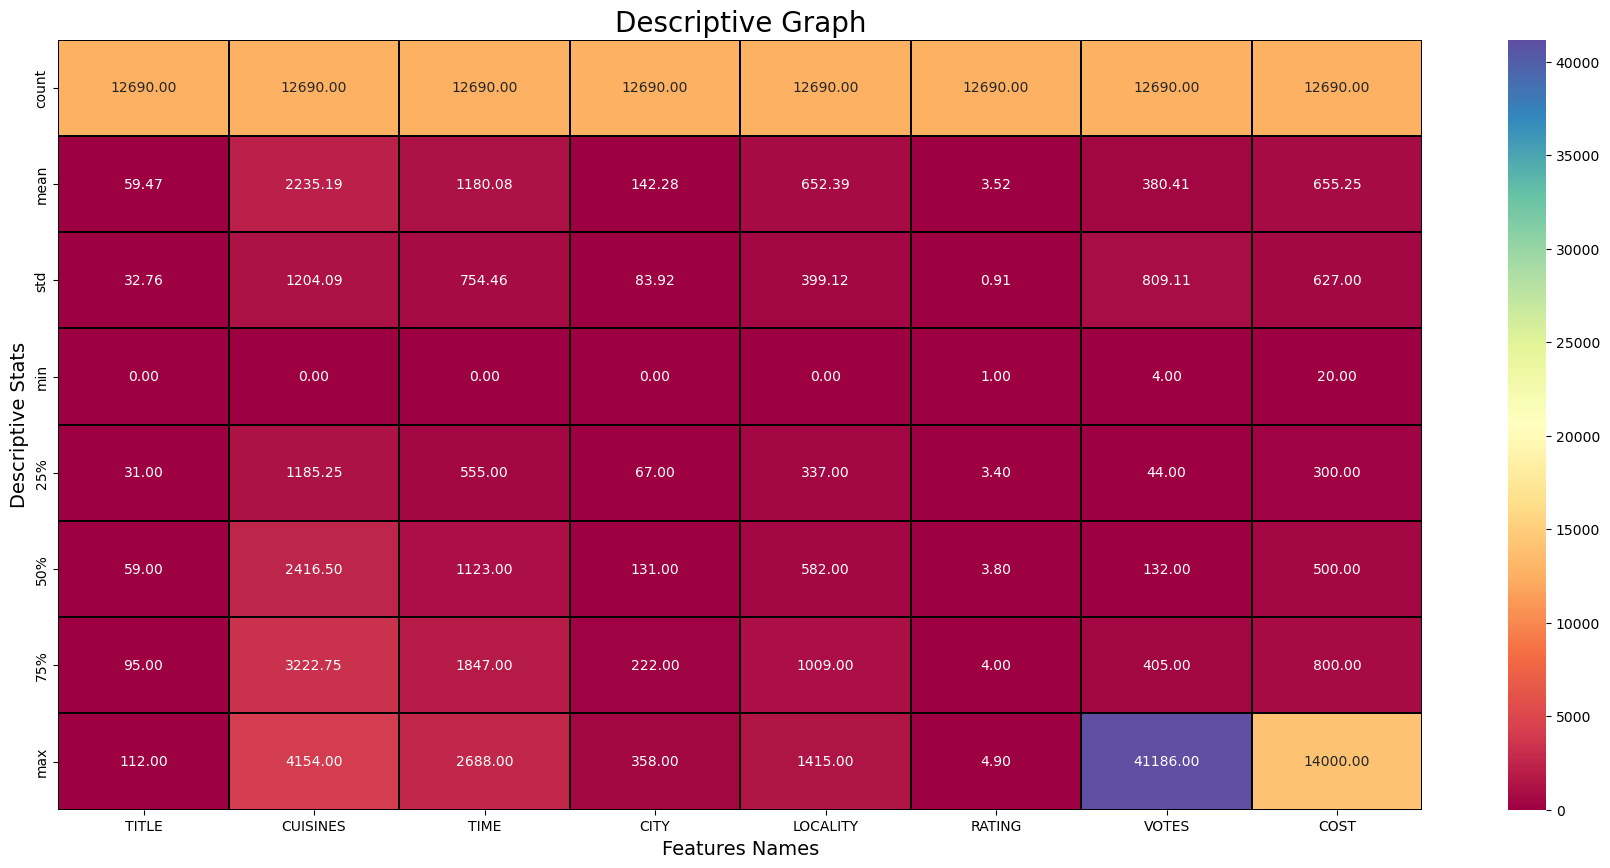

In [53]:
plt.figure(figsize=(22,10))
sns.heatmap(train_df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Features Names",fontsize=14)
plt.ylabel("Descriptive Stats",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

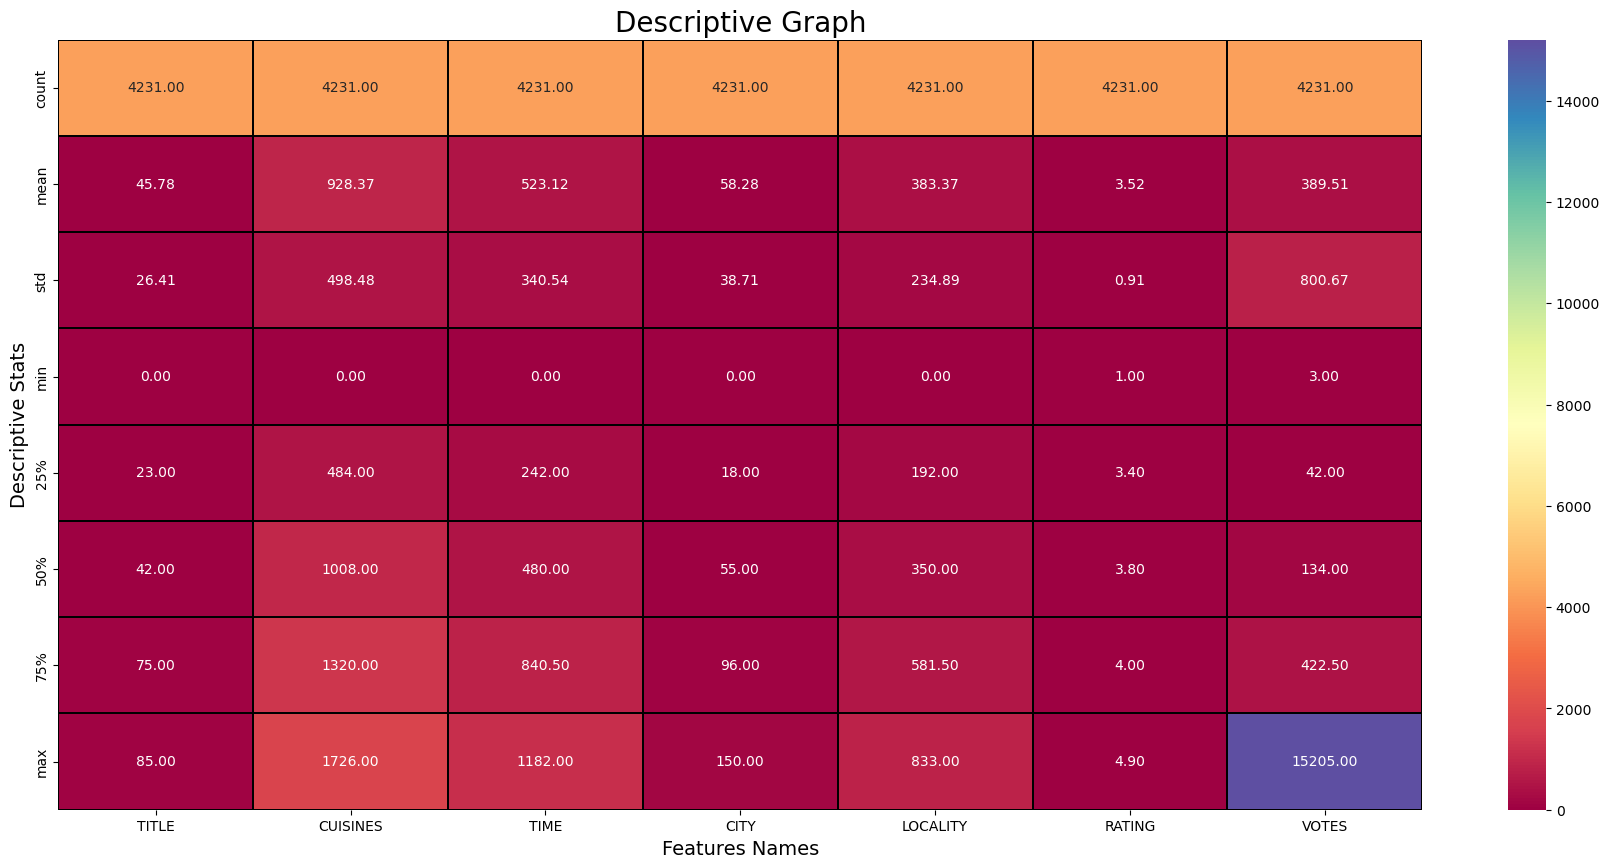

In [54]:
plt.figure(figsize=(22,10))
sns.heatmap(test_df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Features Names",fontsize=14)
plt.ylabel("Descriptive Stats",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

# Data Visualization

Univariate Analysis

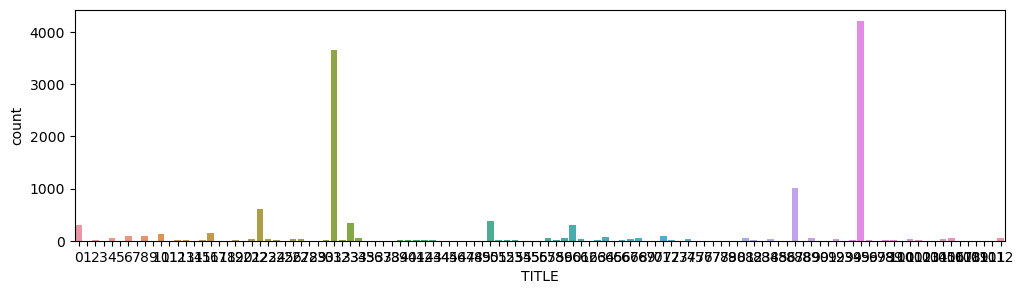

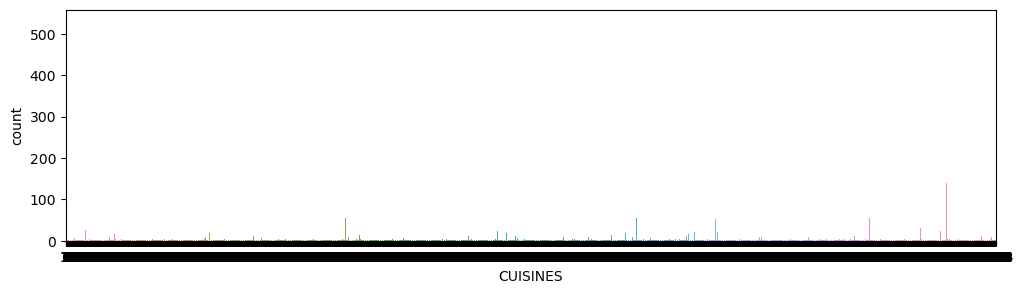

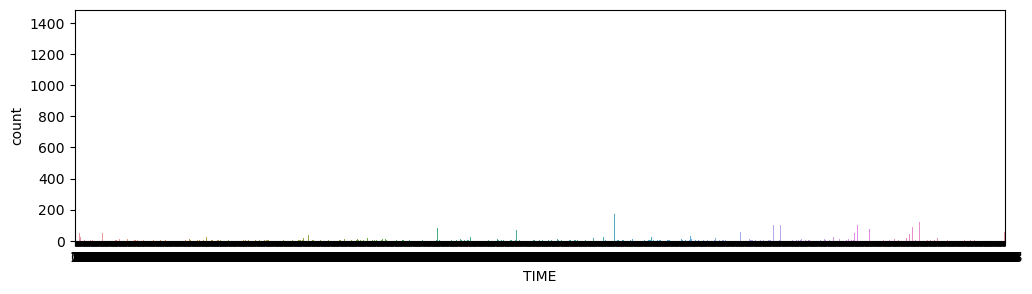

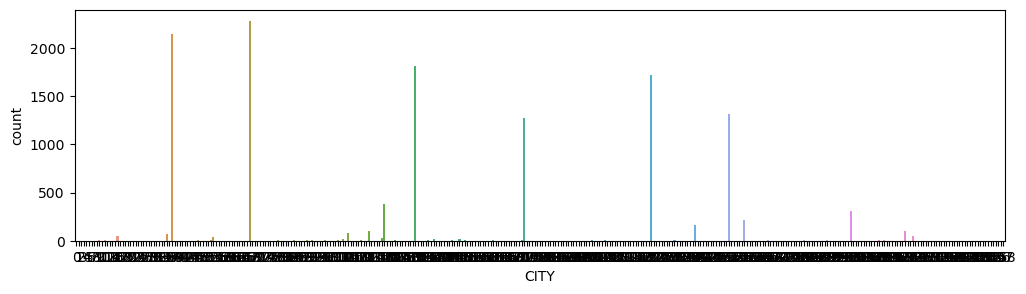

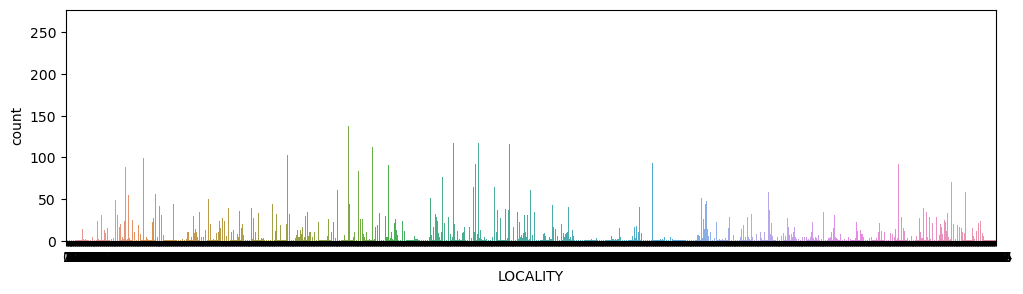

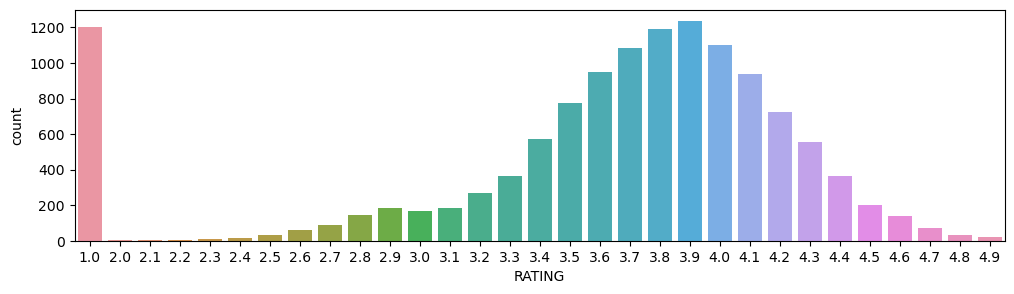

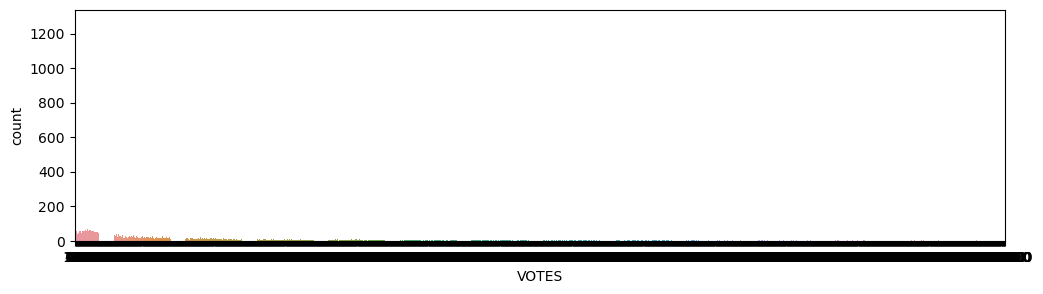

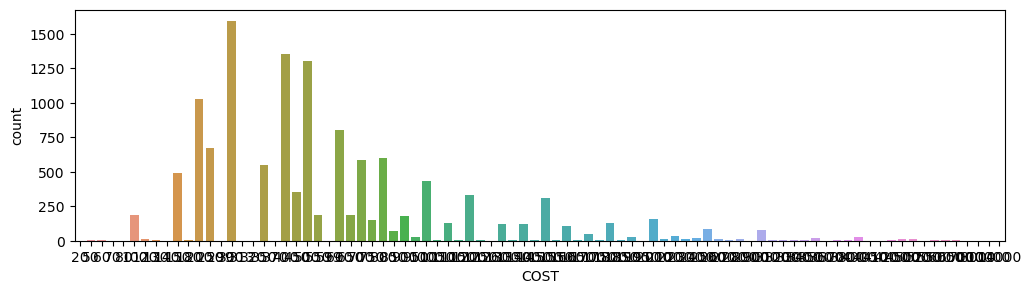

In [55]:
# Checking the count of each feature and target variable

for i in train_df:
    plt.figure(figsize=(12,3),facecolor="white")
    sns.countplot(x=i,data=train_df)
plt.show()

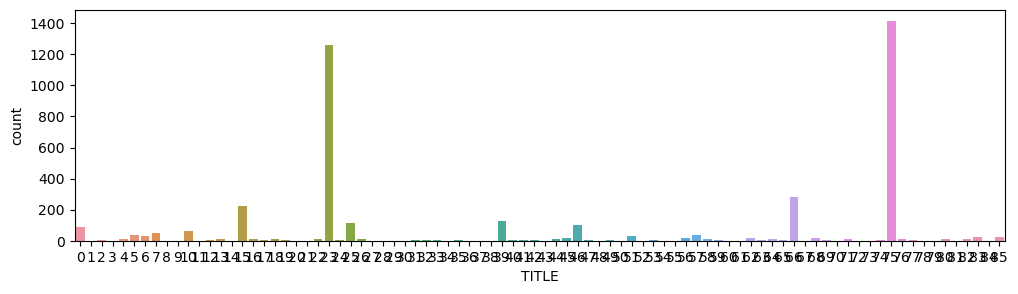

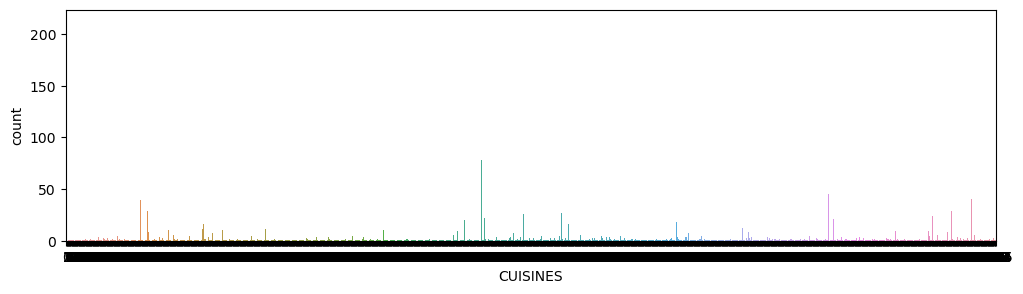

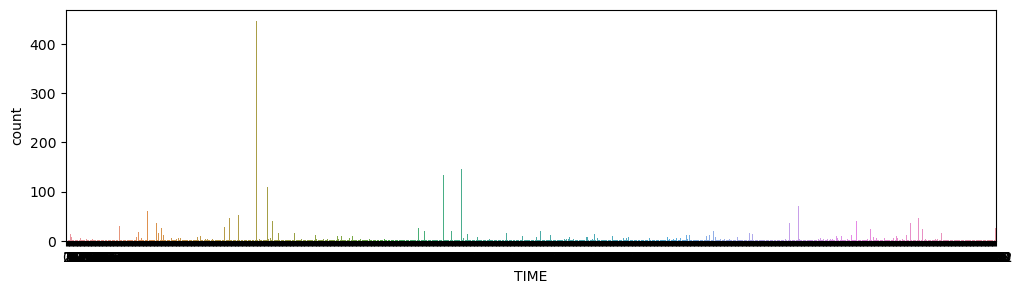

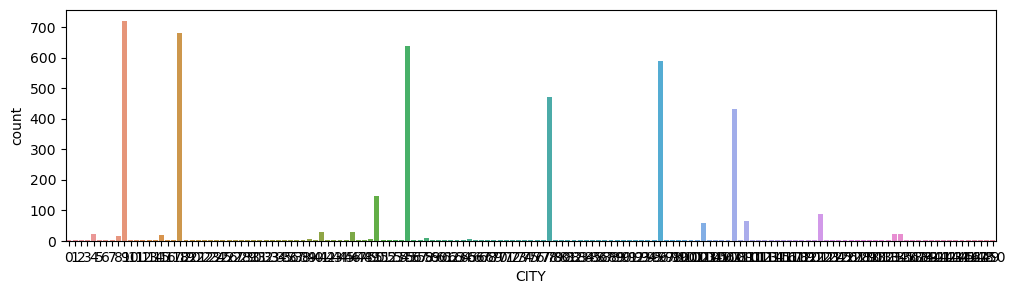

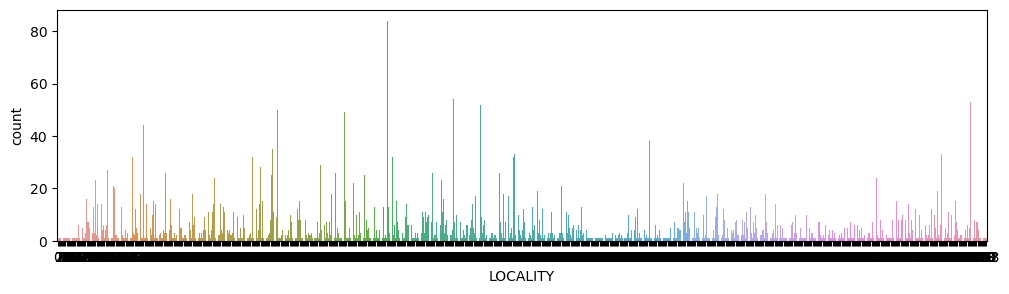

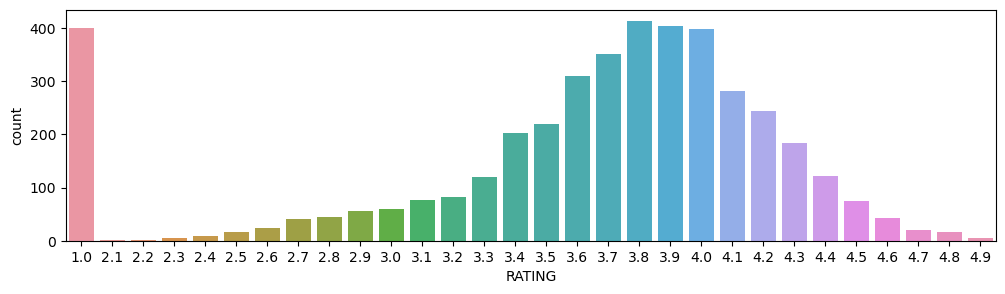

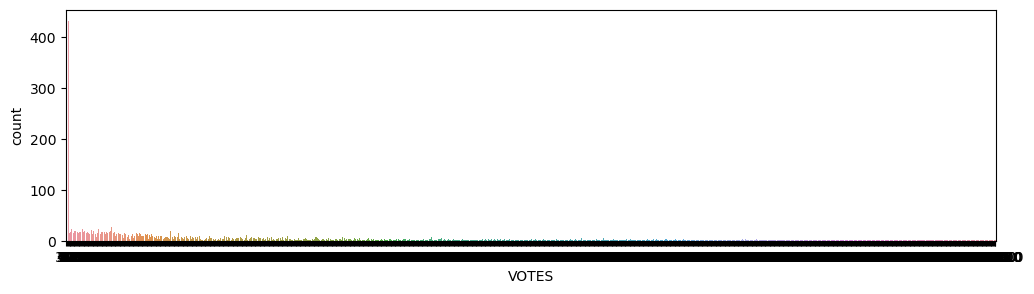

In [56]:
# Checking the count of each feature and target variable in test table

for i in test_df:
    plt.figure(figsize=(12,3),facecolor="white")
    sns.countplot(x=i,data=test_df)
plt.show()

count plot shows the data distribution of each feature with unique value as we can observe that there is non uniform data distribution in all feature in both train and test dataframe 

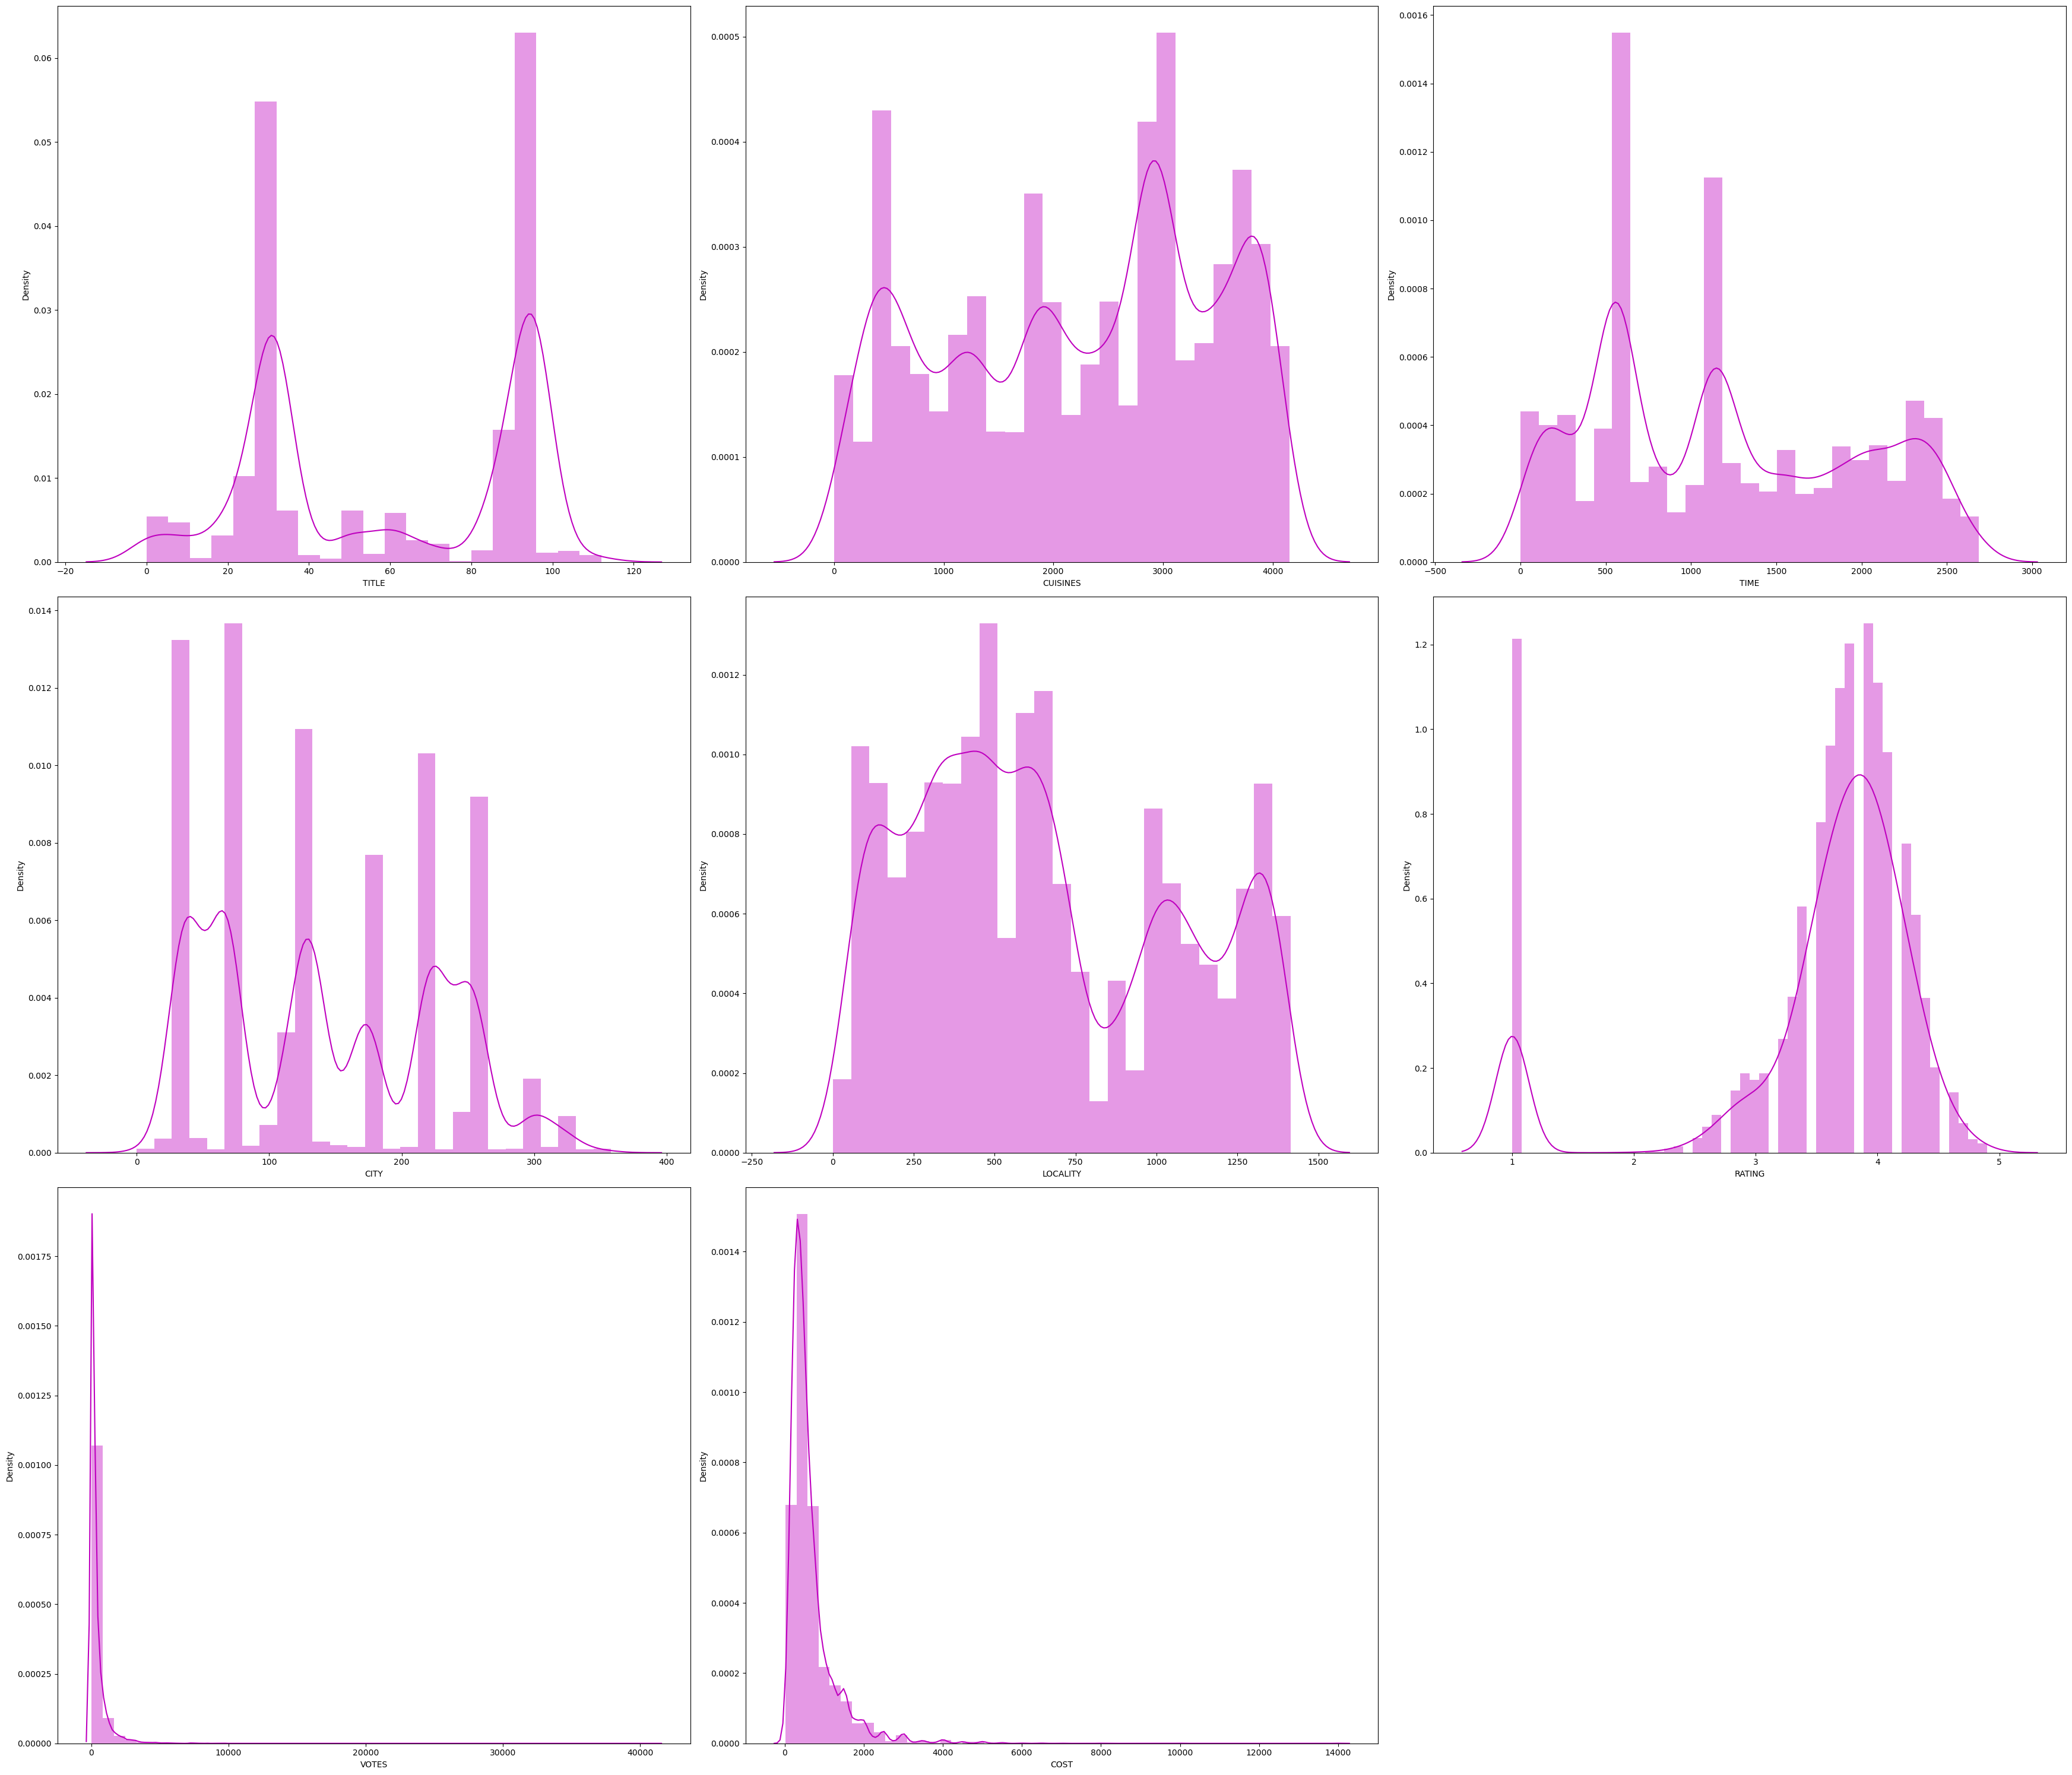

In [57]:
#Checking the data Distribution

# Lets check how the data has been distributed in numerical column

plt.figure(figsize=(35,30),facecolor="white")
plotnum=1
for col in train_df:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.distplot(train_df[col],color="m")
        plt.xlabel(col,fontsize = 10)
        plt.yticks(rotation=0, fontsize = 10)
        plotnum+=1
            
plt.tight_layout()
plt.show()

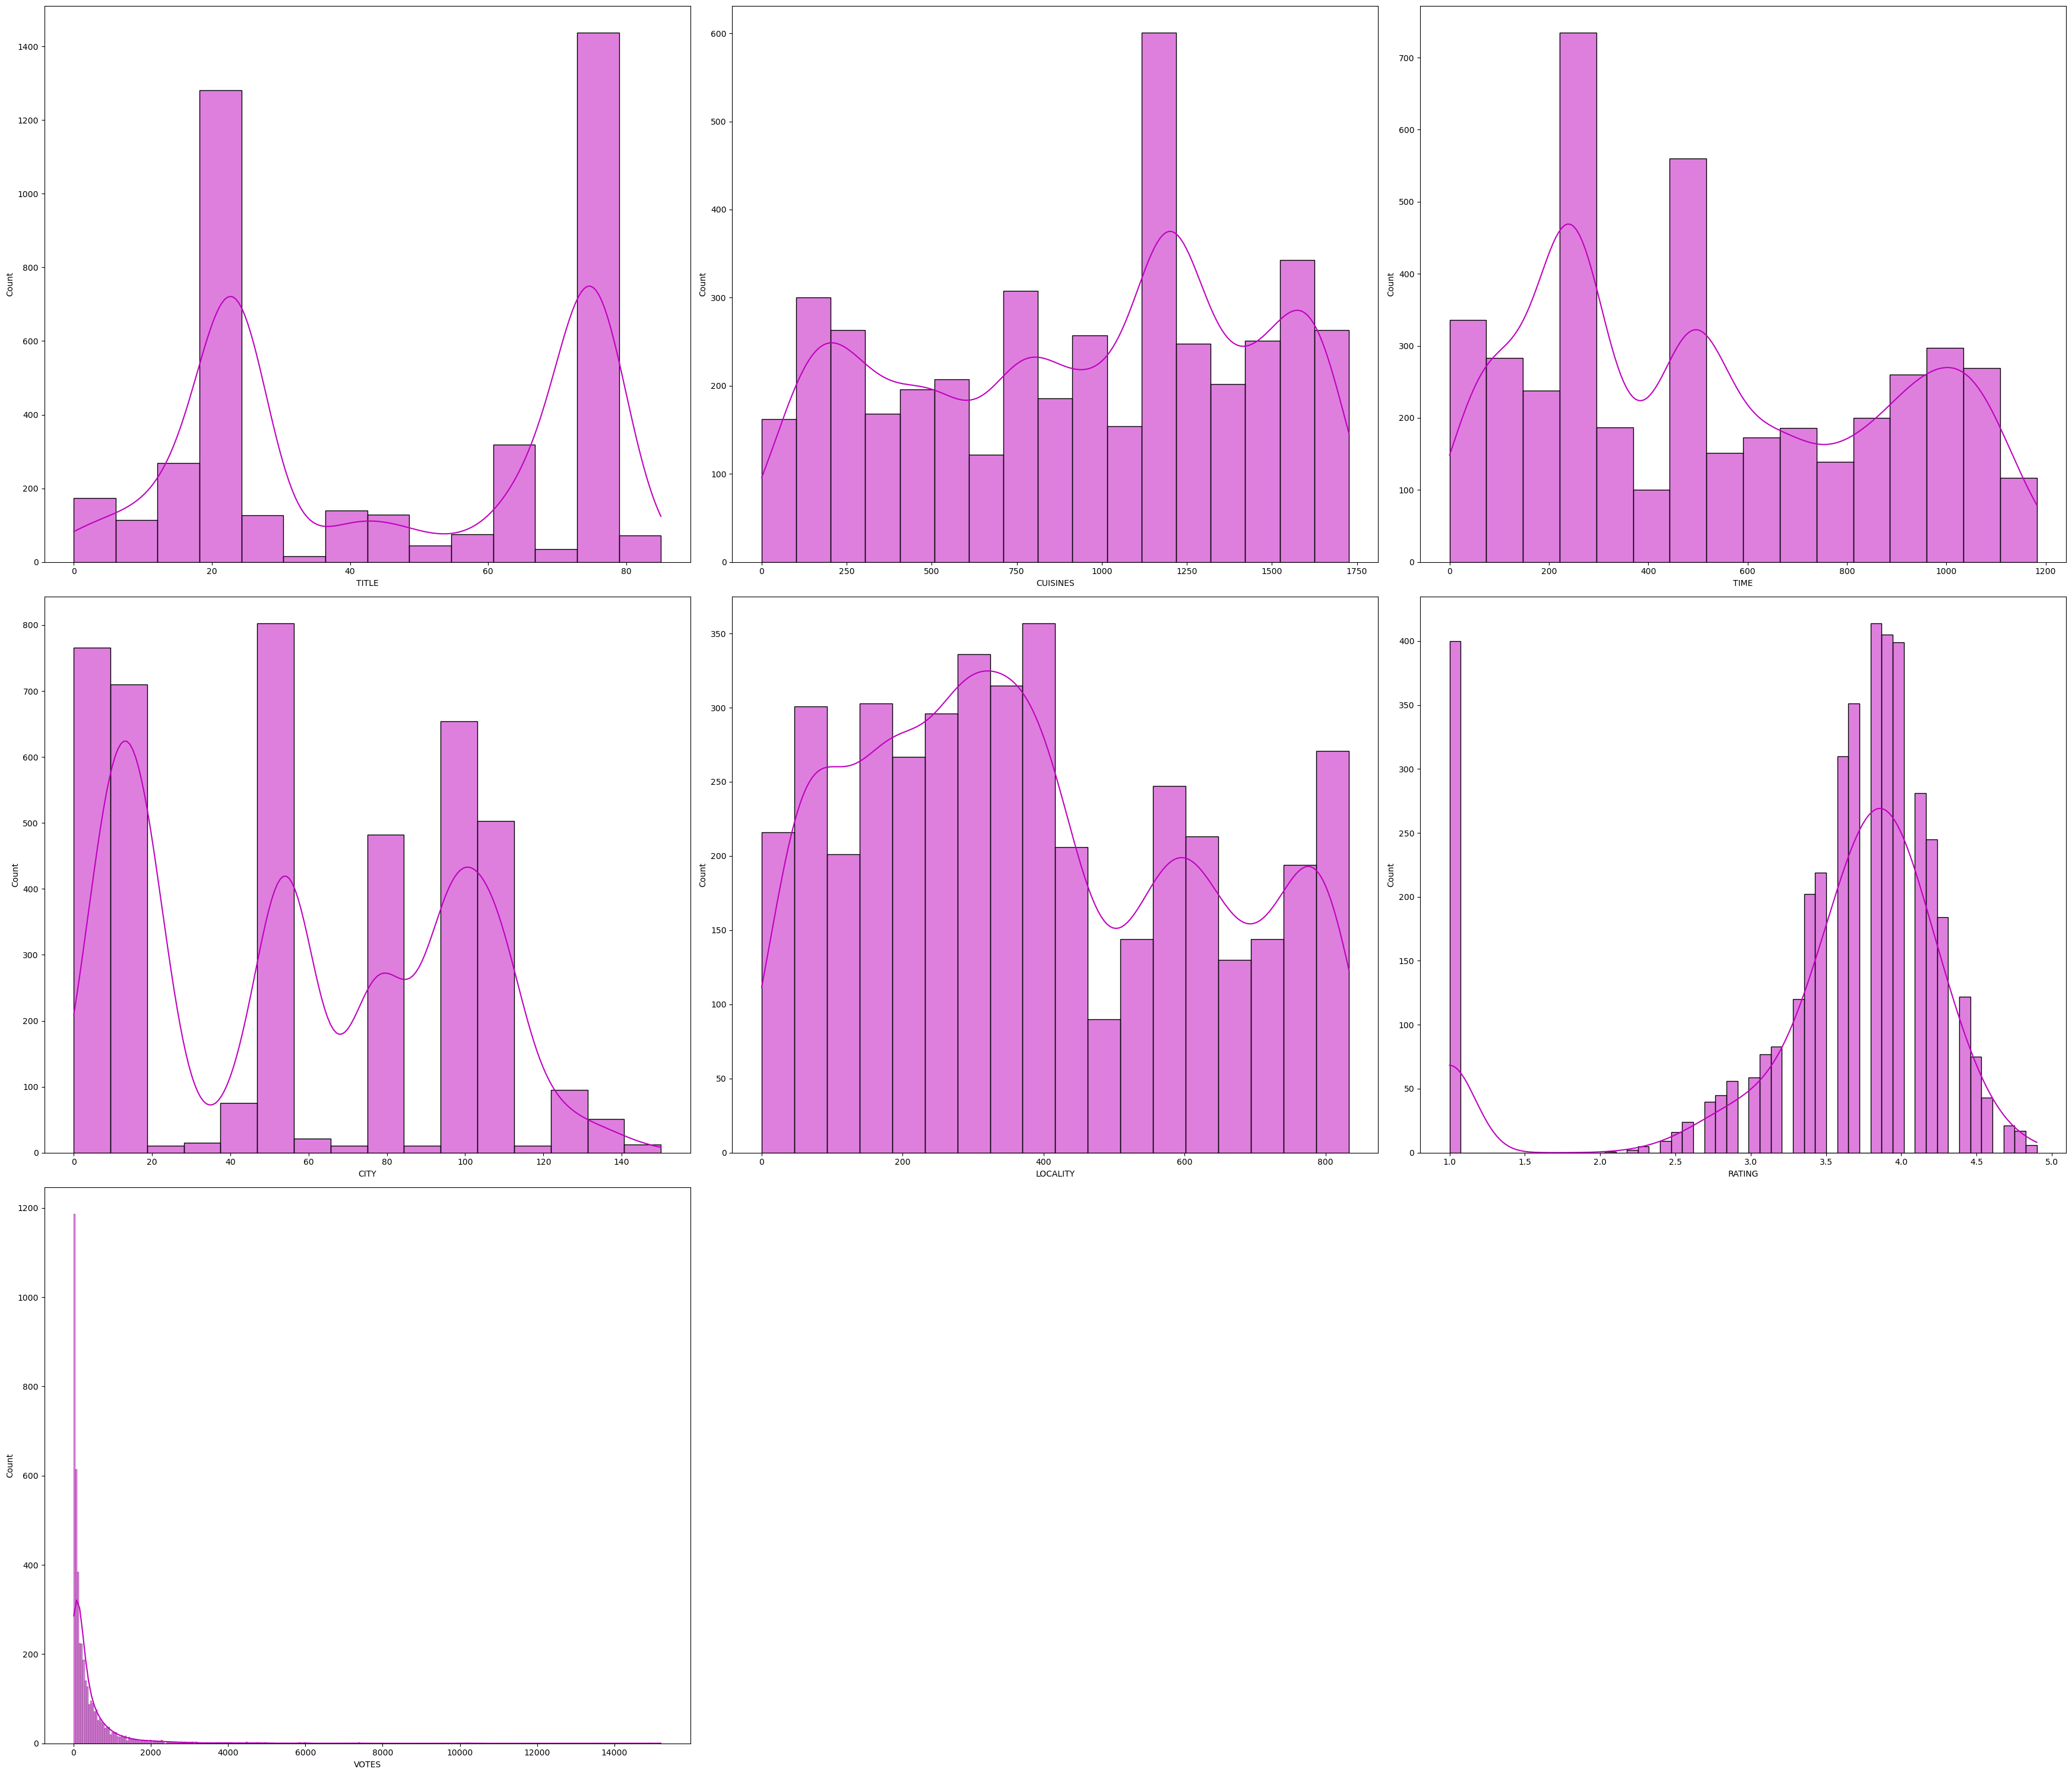

In [58]:
# Checking the data distribution in numerical columns

plt.figure(figsize=(35, 30), facecolor="white")
plotnum = 1

for col in test_df.columns:
    if plotnum <= 8:
        plt.subplot(3, 3, plotnum)
        sns.histplot(test_df[col], kde=True, color="m")
        plt.xlabel(col, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plotnum += 1

    
        
plt.tight_layout()
plt.show()


# Bivariate Analysis

<Figure size 200x200 with 0 Axes>

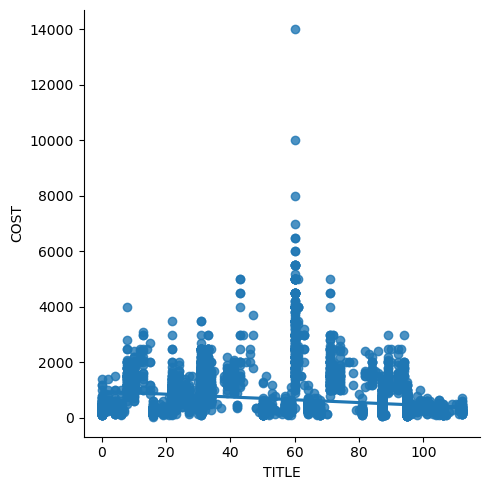

<Figure size 200x200 with 0 Axes>

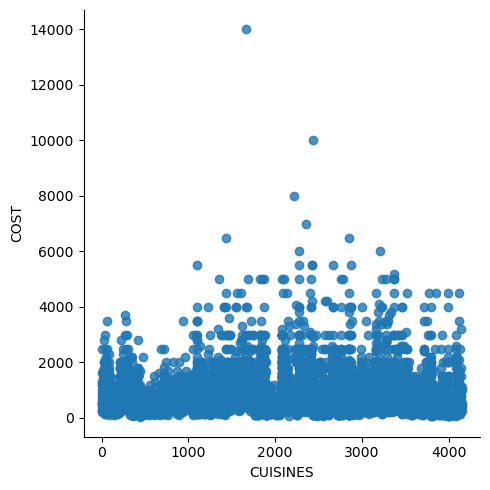

<Figure size 200x200 with 0 Axes>

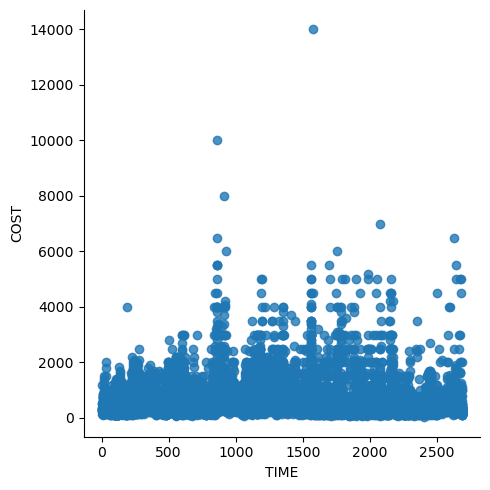

<Figure size 200x200 with 0 Axes>

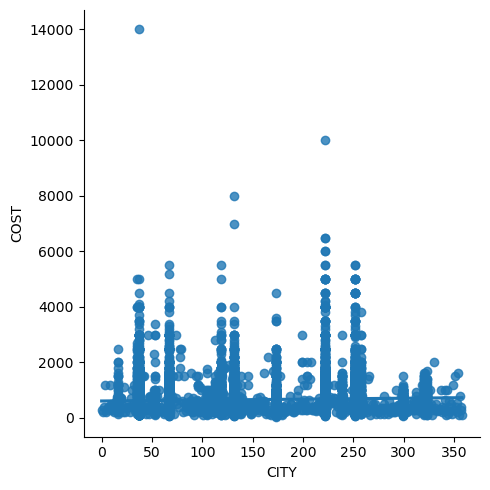

<Figure size 200x200 with 0 Axes>

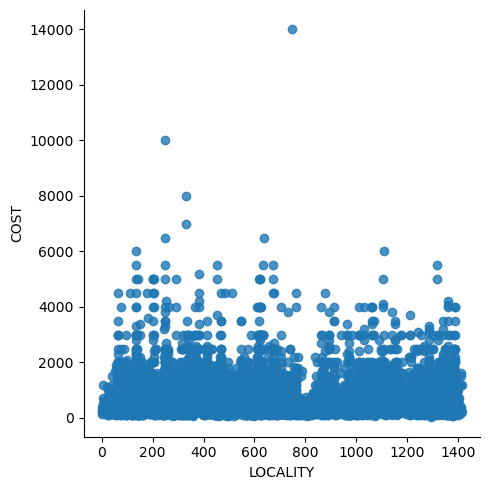

<Figure size 200x200 with 0 Axes>

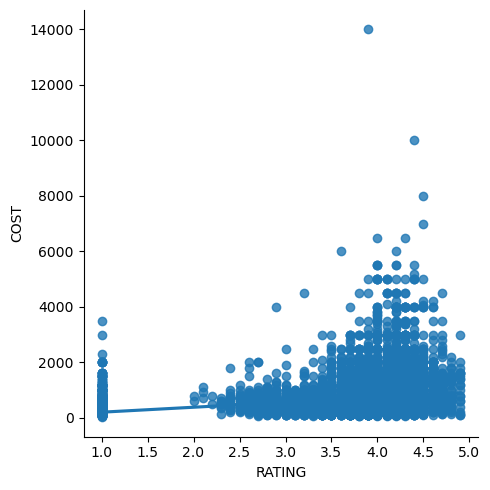

<Figure size 200x200 with 0 Axes>

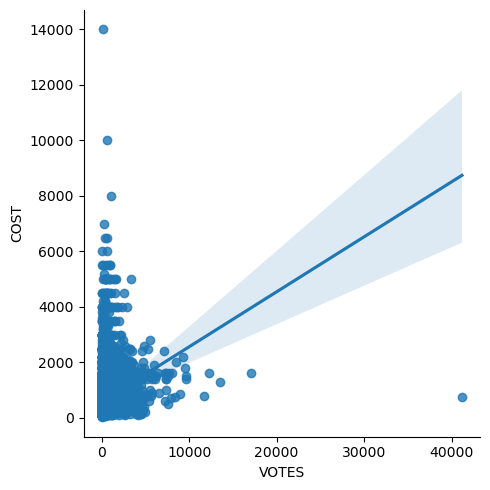

<Figure size 200x200 with 0 Axes>

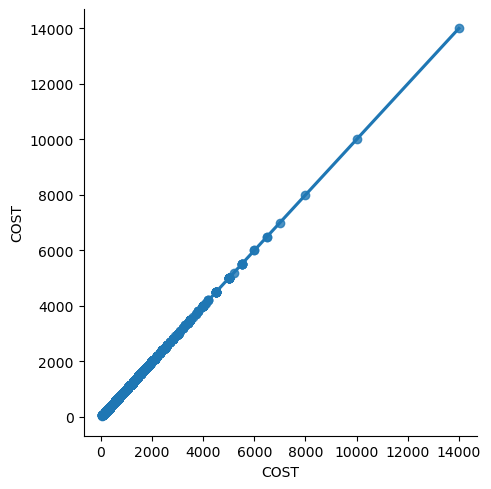

In [59]:
for i in  train_df.columns:
    plt.figure(figsize=(2,2),facecolor="white")
    sns.lmplot(x=i ,y="COST", data=train_df, palette="colorblind")
    plt.xlabel(i)
    plt.ylabel("COST")
plt.show()

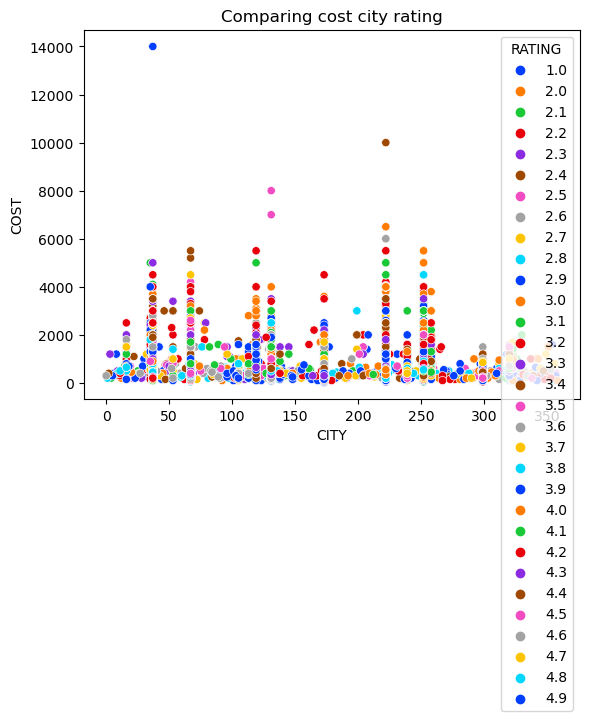

In [60]:
#Checking relationship of cost city rating
plt.title("Comparing cost city rating")
sns.scatterplot(x="CITY",y="COST",data=train_df,hue="RATING",palette="bright")
plt.show()

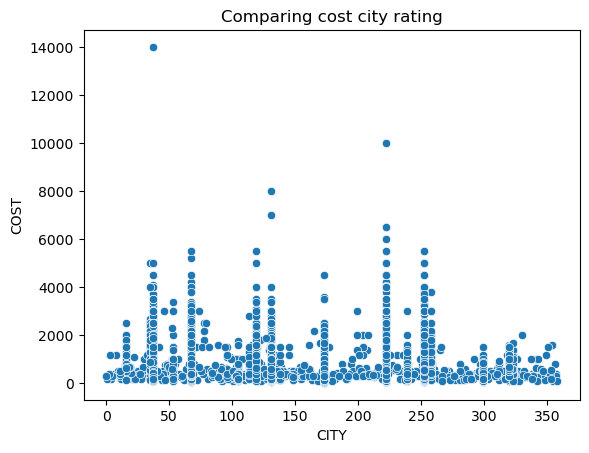

In [61]:
#Checking relationship of cost city 
plt.title("Comparing cost city rating")
sns.scatterplot(x="CITY",y="COST",data=train_df,palette="bright")
plt.show()

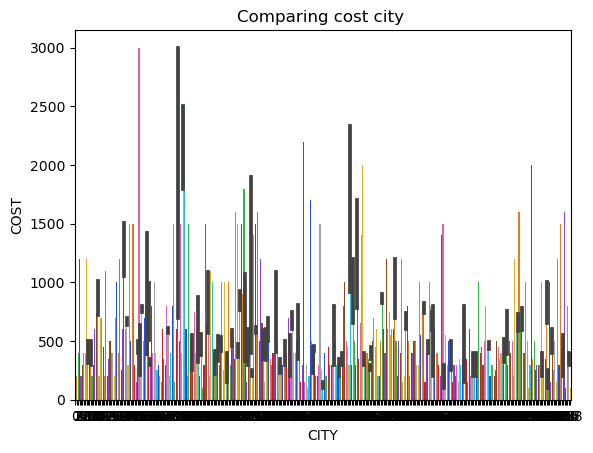

In [62]:
#Checking relationship of cost city
plt.title("Comparing cost city ")
sns.barplot(x="CITY",y="COST",data=train_df,palette="bright")
plt.show()

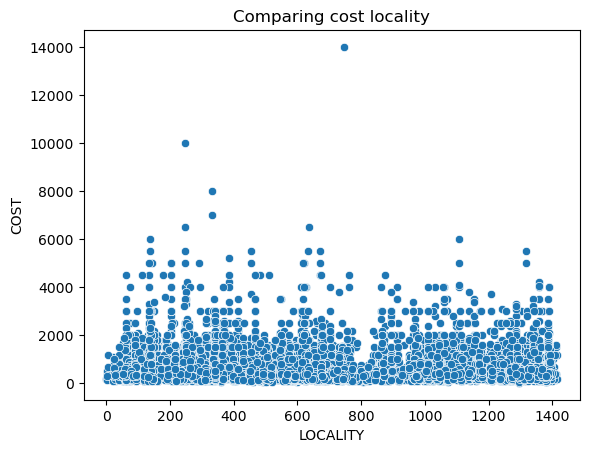

In [63]:
#Checking relationship of cost locality
plt.title("Comparing cost locality")
sns.scatterplot(x="LOCALITY",y="COST",data=train_df,palette="bright")
plt.show()

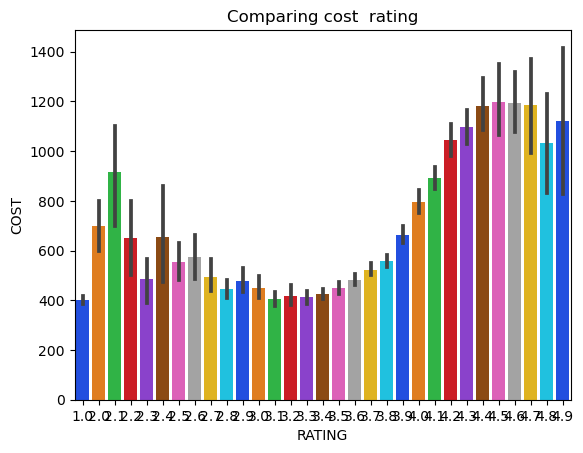

In [64]:
plt.title("Comparing cost  rating")
sns.barplot(x="RATING",y="COST",data=train_df,palette="bright")
plt.show()

cost is showing linear relationship with rating above 4 rating has increase in cost

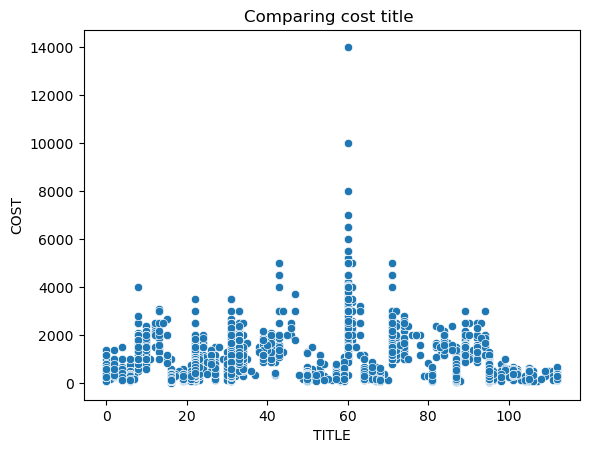

In [65]:
plt.title("Comparing cost title ")
sns.scatterplot(x="TITLE",y="COST",data=train_df,palette="bright")
plt.show()

Graph shows ratings is directly proportion or increase in rating leads high cost of meal and data is similarly arrange in both tables

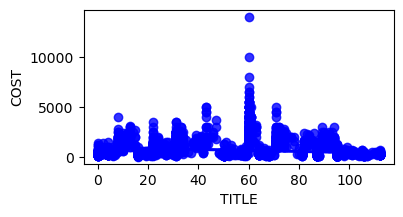

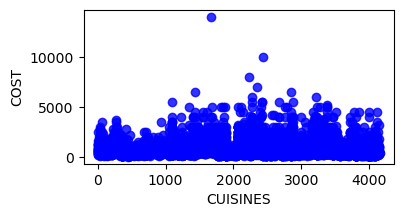

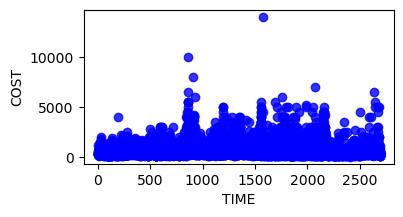

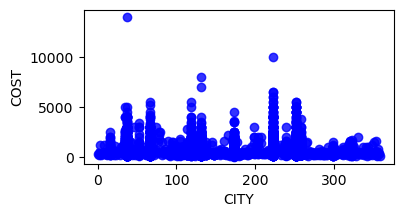

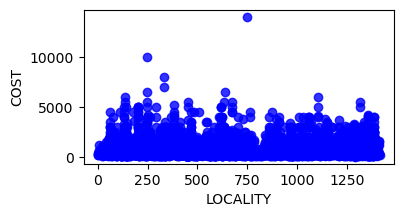

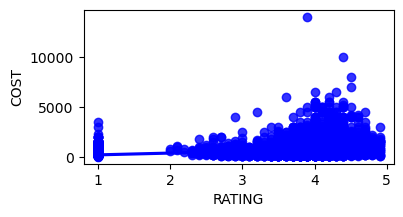

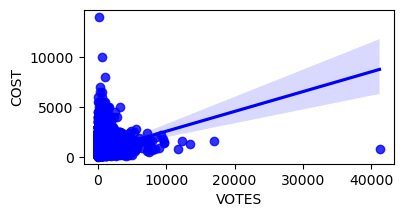

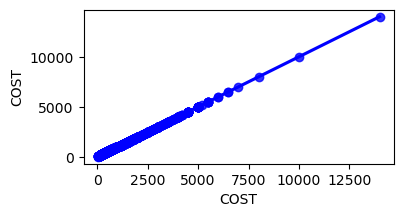

In [66]:
for i in  train_df.columns:
    plt.figure(figsize=(4,2),facecolor="white")
    sns.regplot(x=i ,y="COST", data=train_df, color="b")
    plt.xlabel(i)
    plt.ylabel("COST")
plt.show()

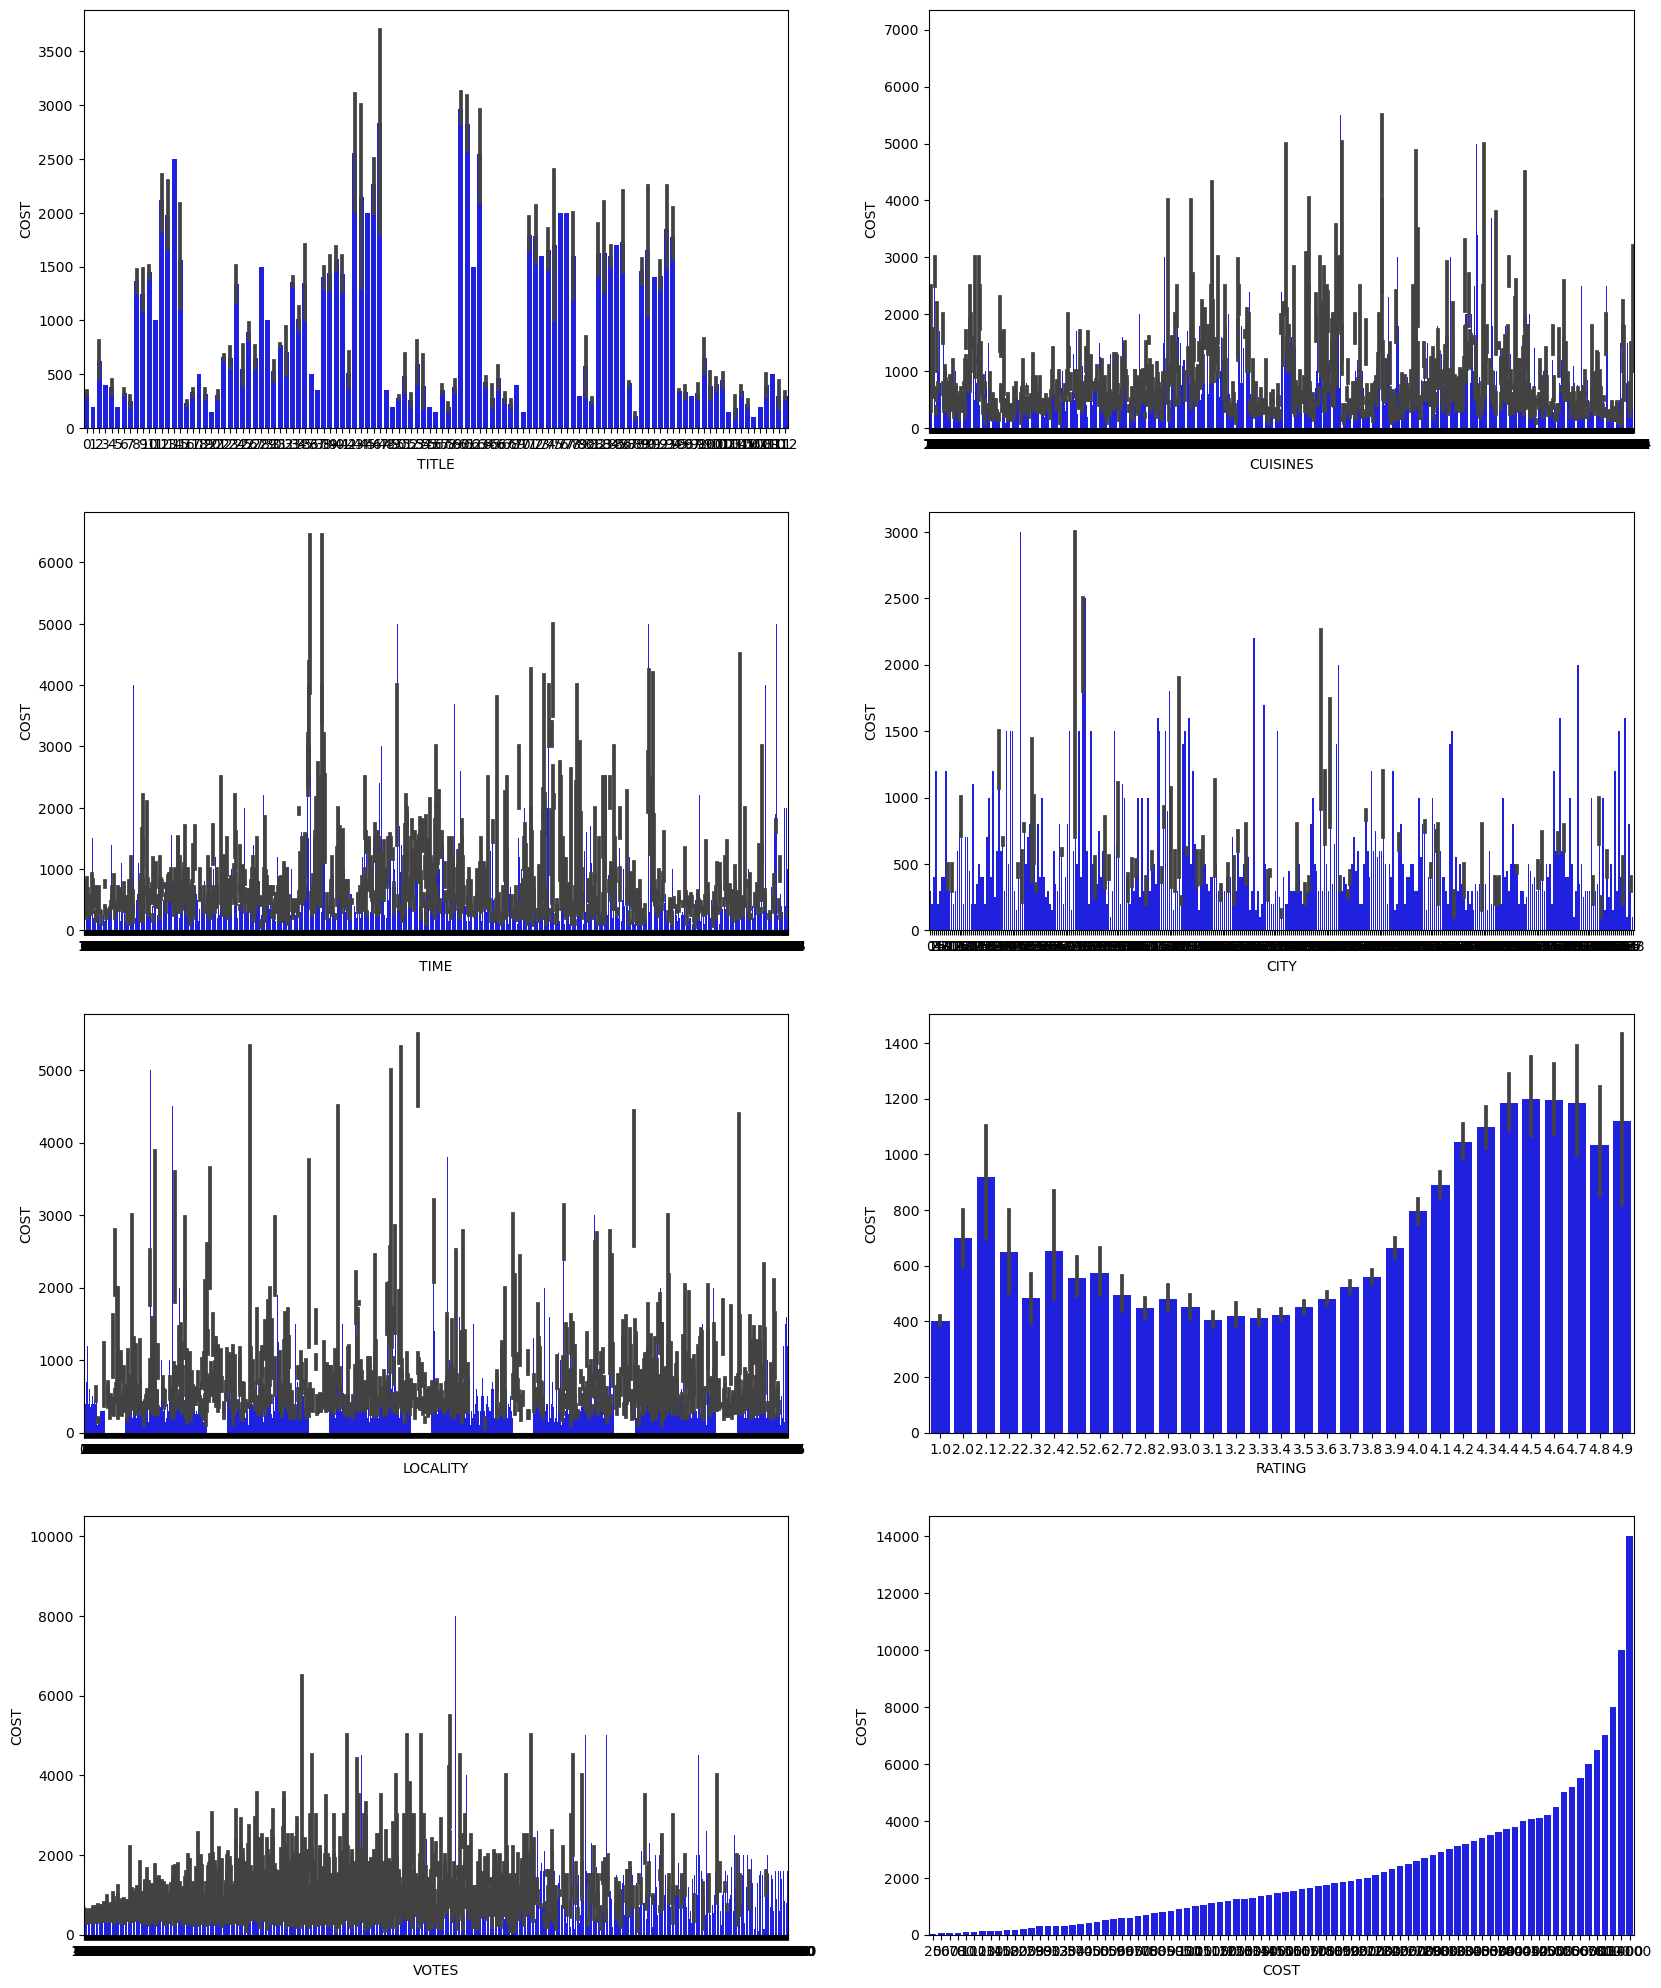

In [67]:
#Comparing charges with other columns using barplot plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in train_df.columns:
    if p<=8:
        plt.subplot(4,2,p)
        sns.barplot(x=i,y="COST", data =train_df,color='b')
        plt.xlabel(i)
        plt.ylabel("COST")
    p+=1
plt.show()

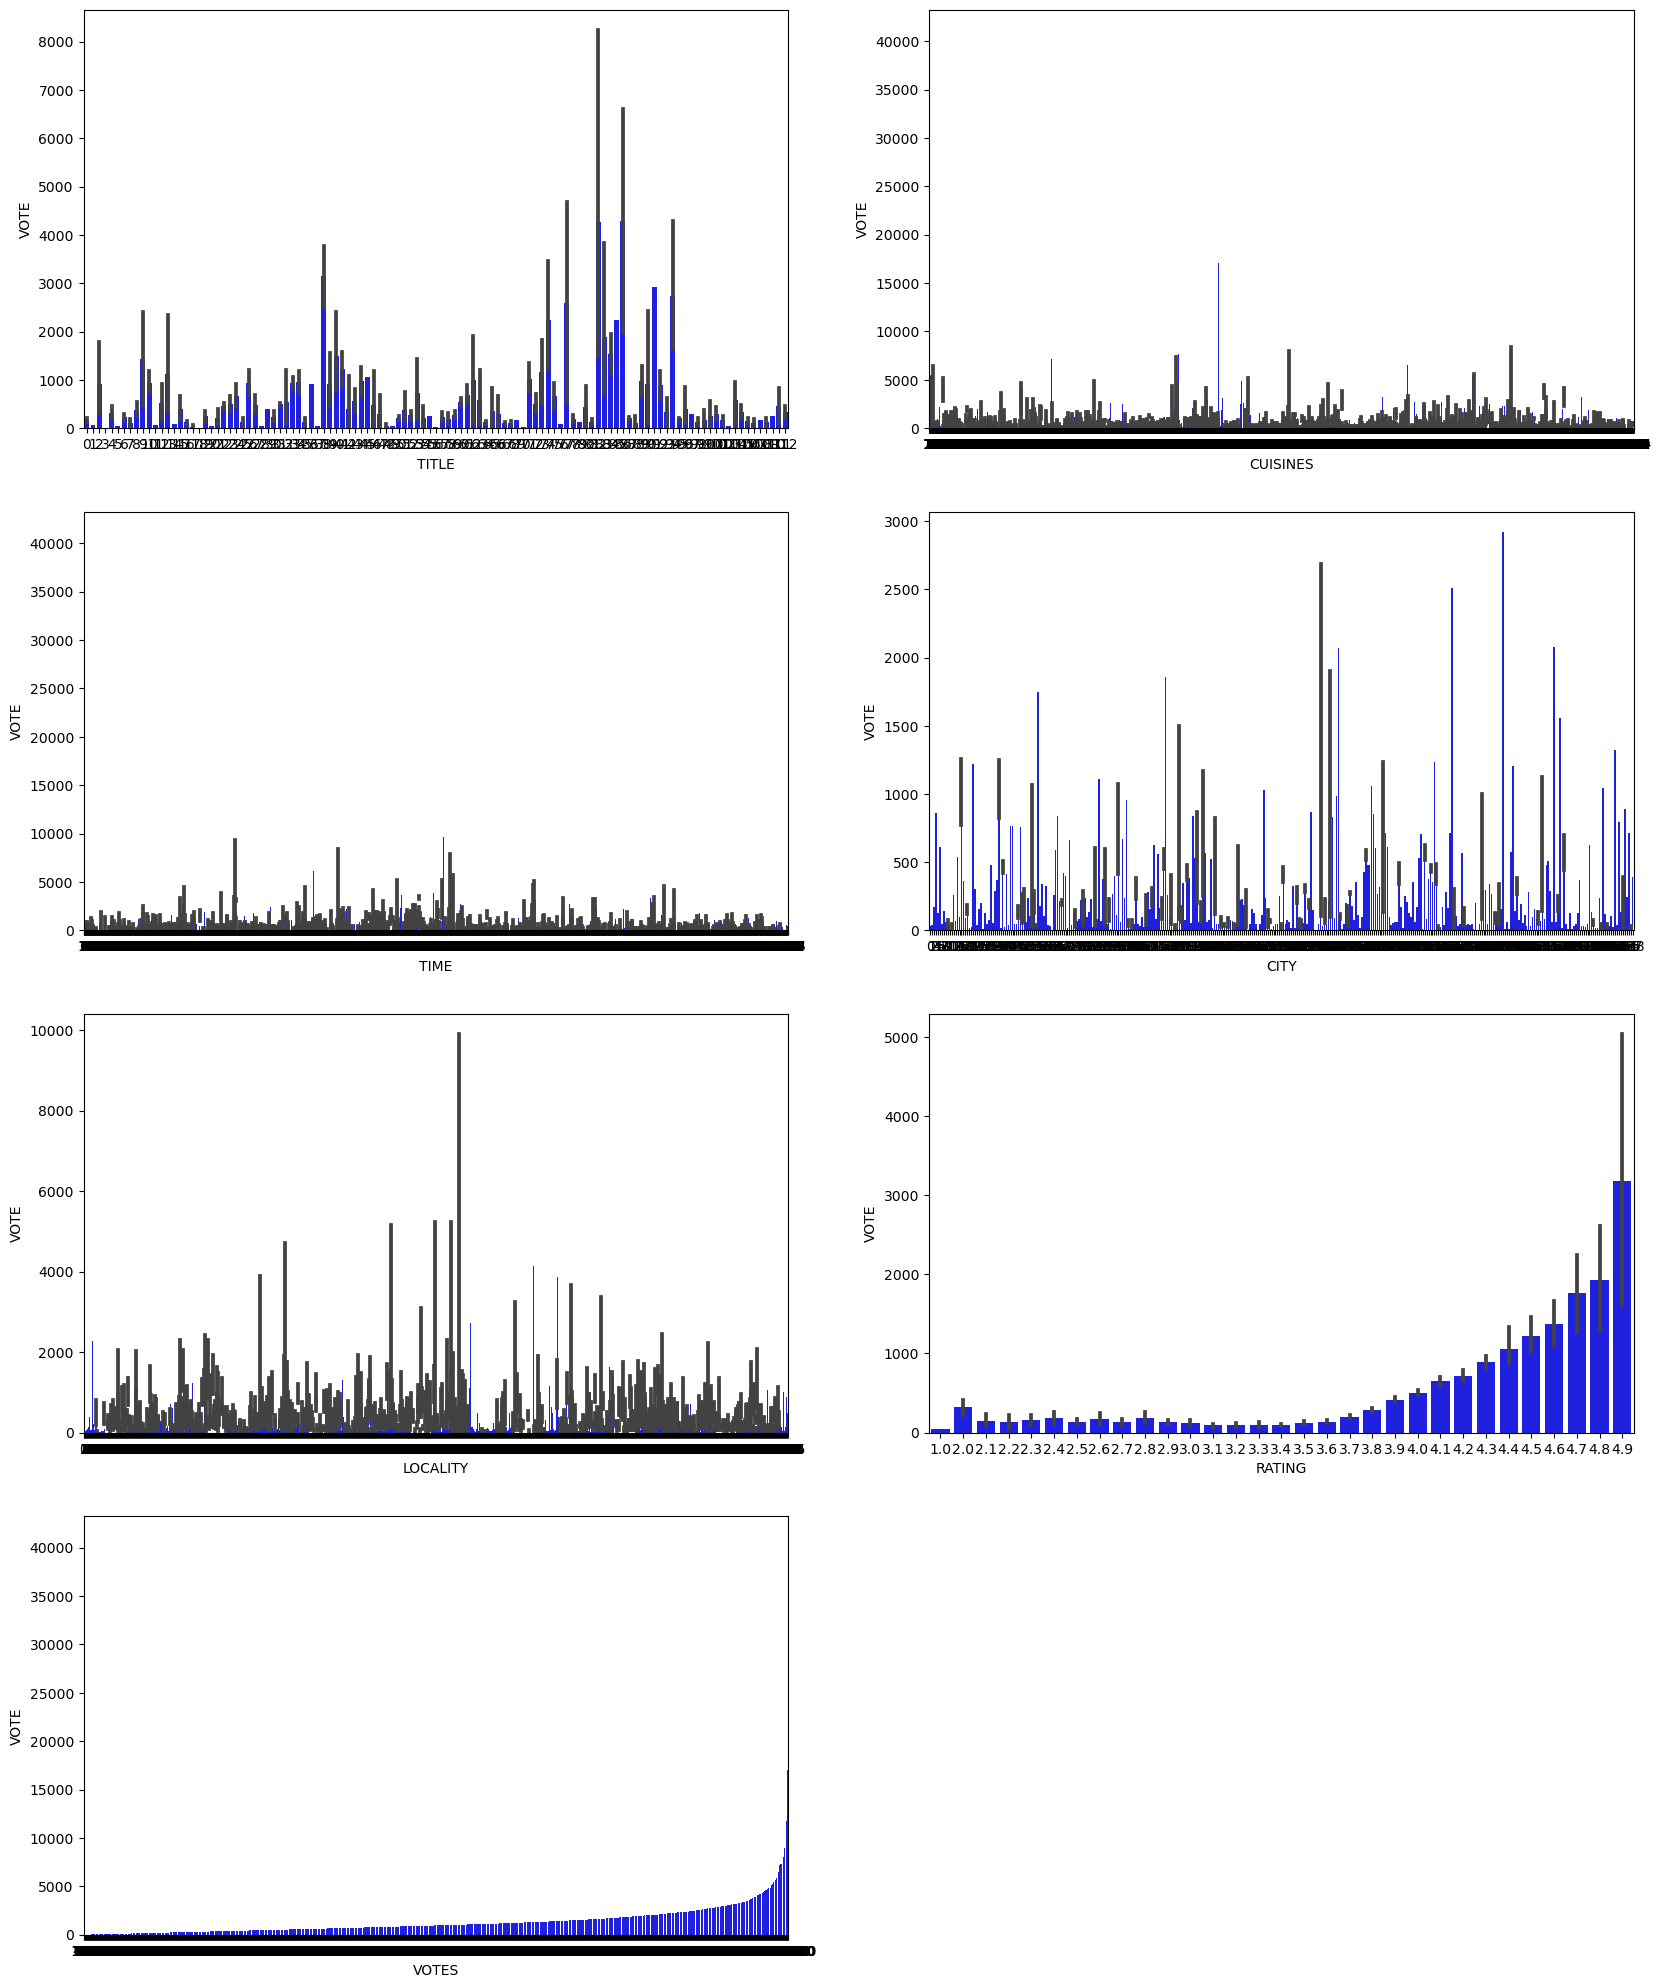

In [68]:
#Comparing charges with other columns using barplot plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in train_df.columns:
    if p<=7:
        plt.subplot(4,2,p)
        sns.barplot(x=i,y="VOTES", data =train_df.iloc[:,0:8],color='b')
        plt.xlabel(i)
        plt.ylabel("VOTE")
    p+=1
plt.show()

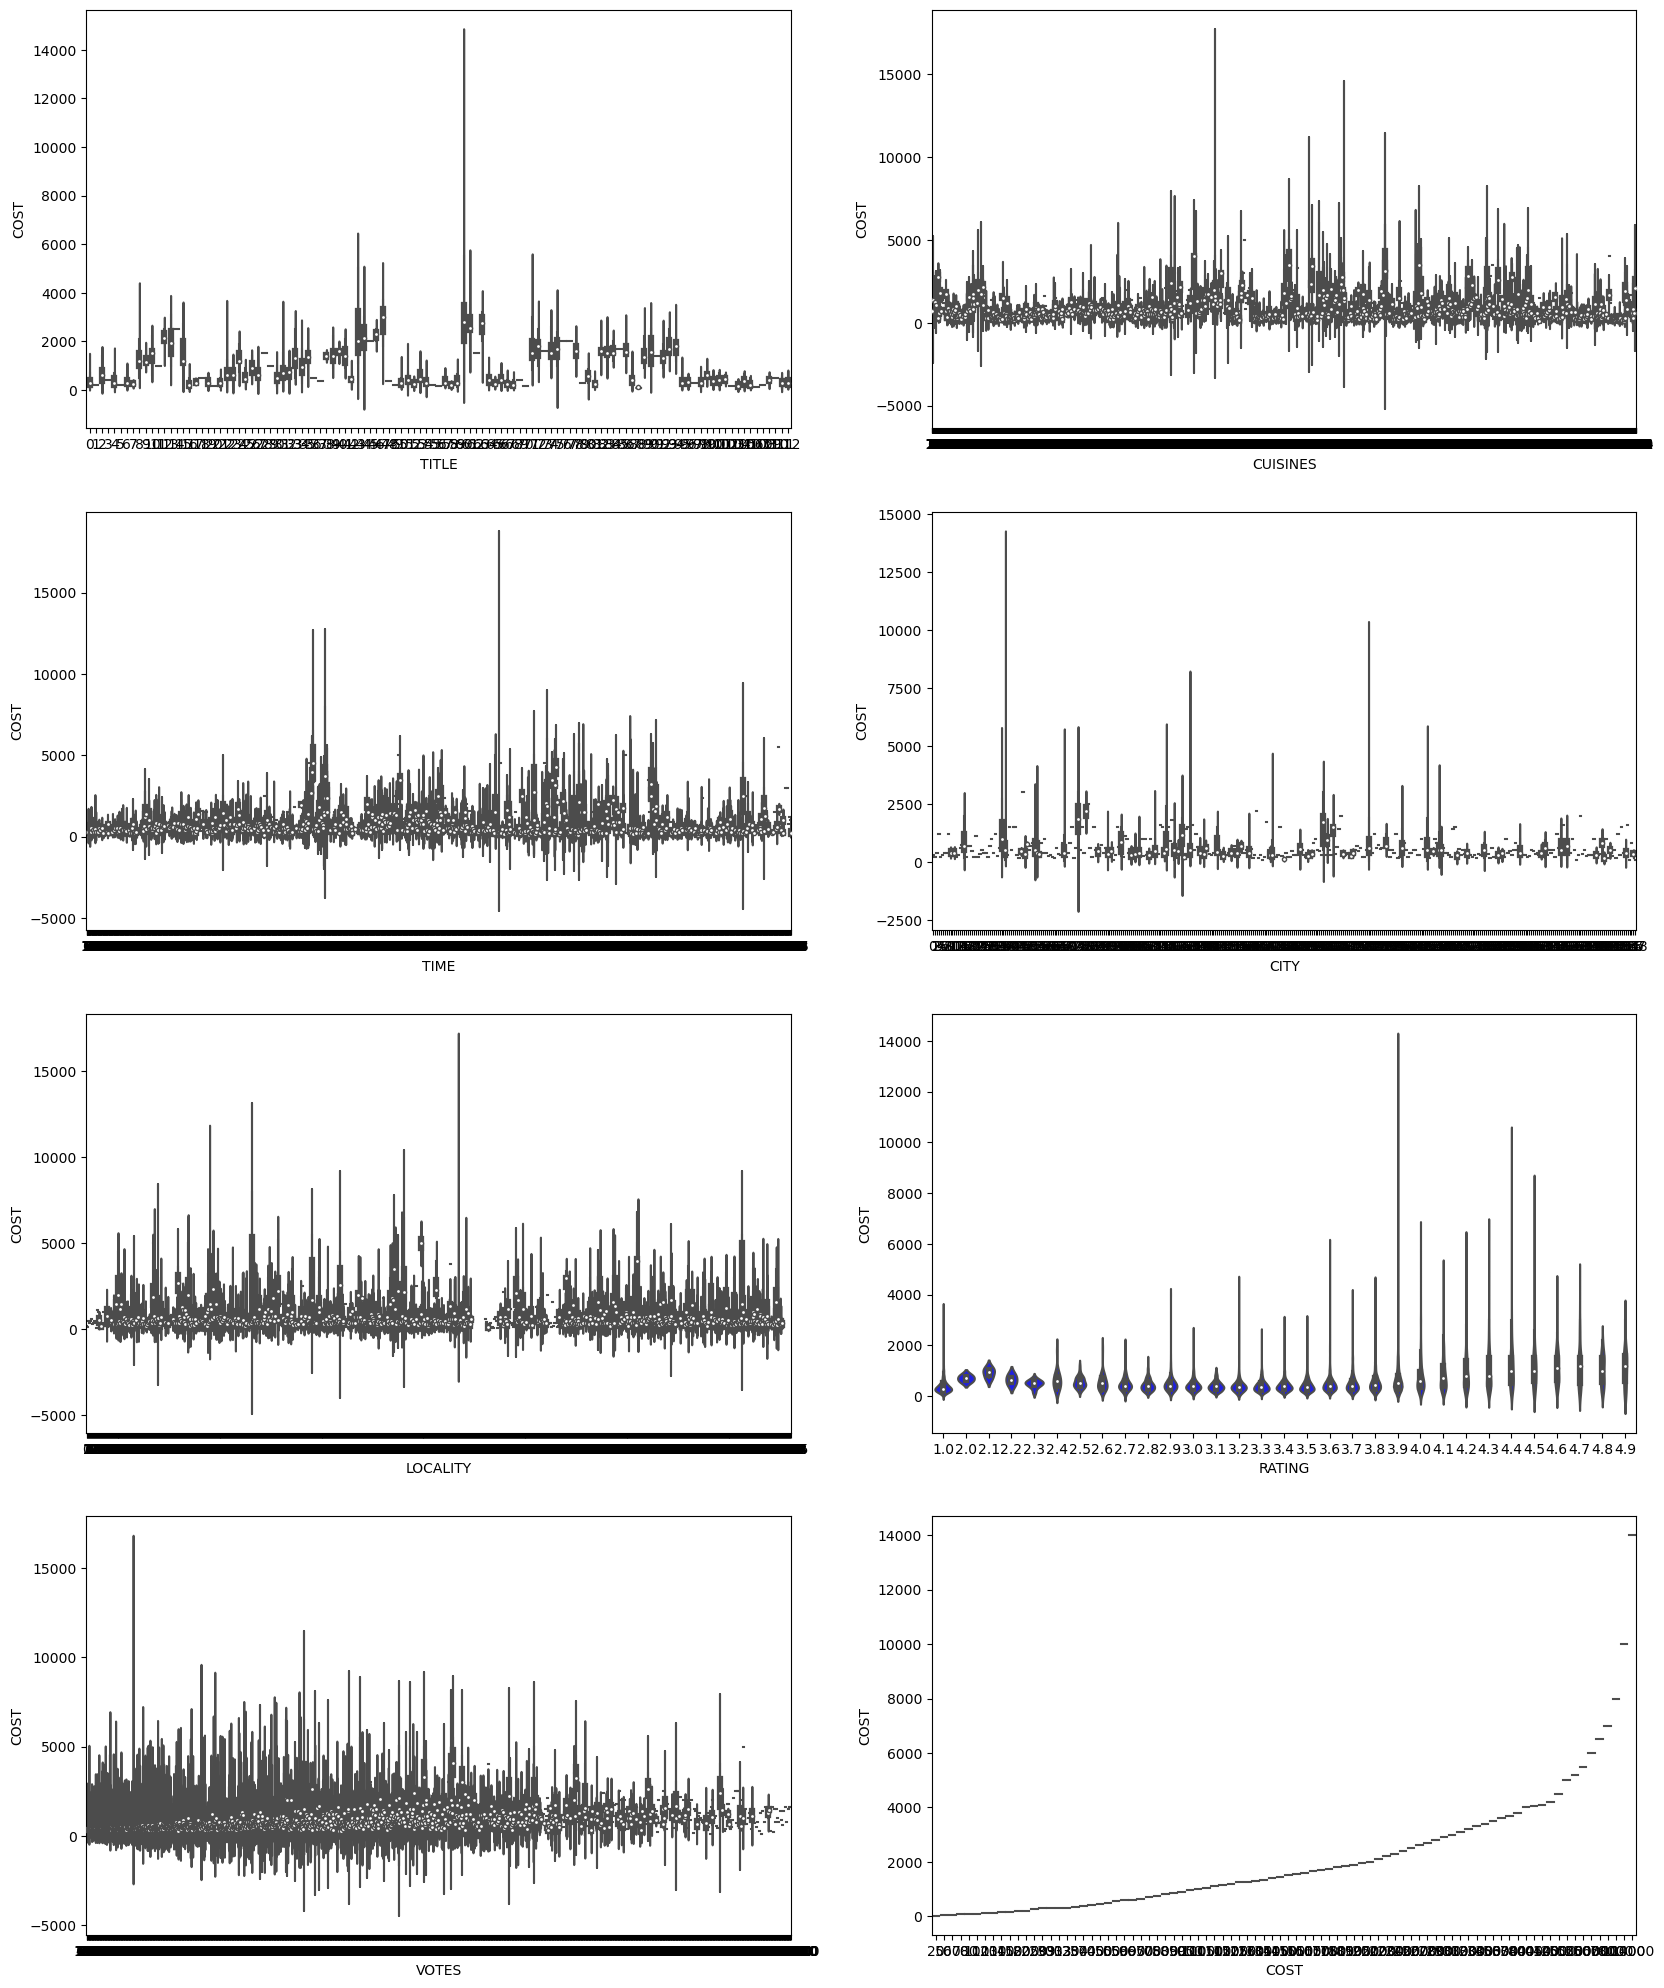

In [69]:
#Comparing charges with other columns using violin plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in train_df.columns:
    if p<=8:
        plt.subplot(4,2,p)
        sns.violinplot(x=i,y="COST", data =train_df,color='b')
        plt.xlabel(i)
        plt.ylabel("COST")
    p+=1
plt.show()

In [70]:
#Converting the datatype of Date Column form object to datetime format



Checking all the plot to find any hidden pattern and insight for model building as we get different information from using different plot 

# Multivariate analysis


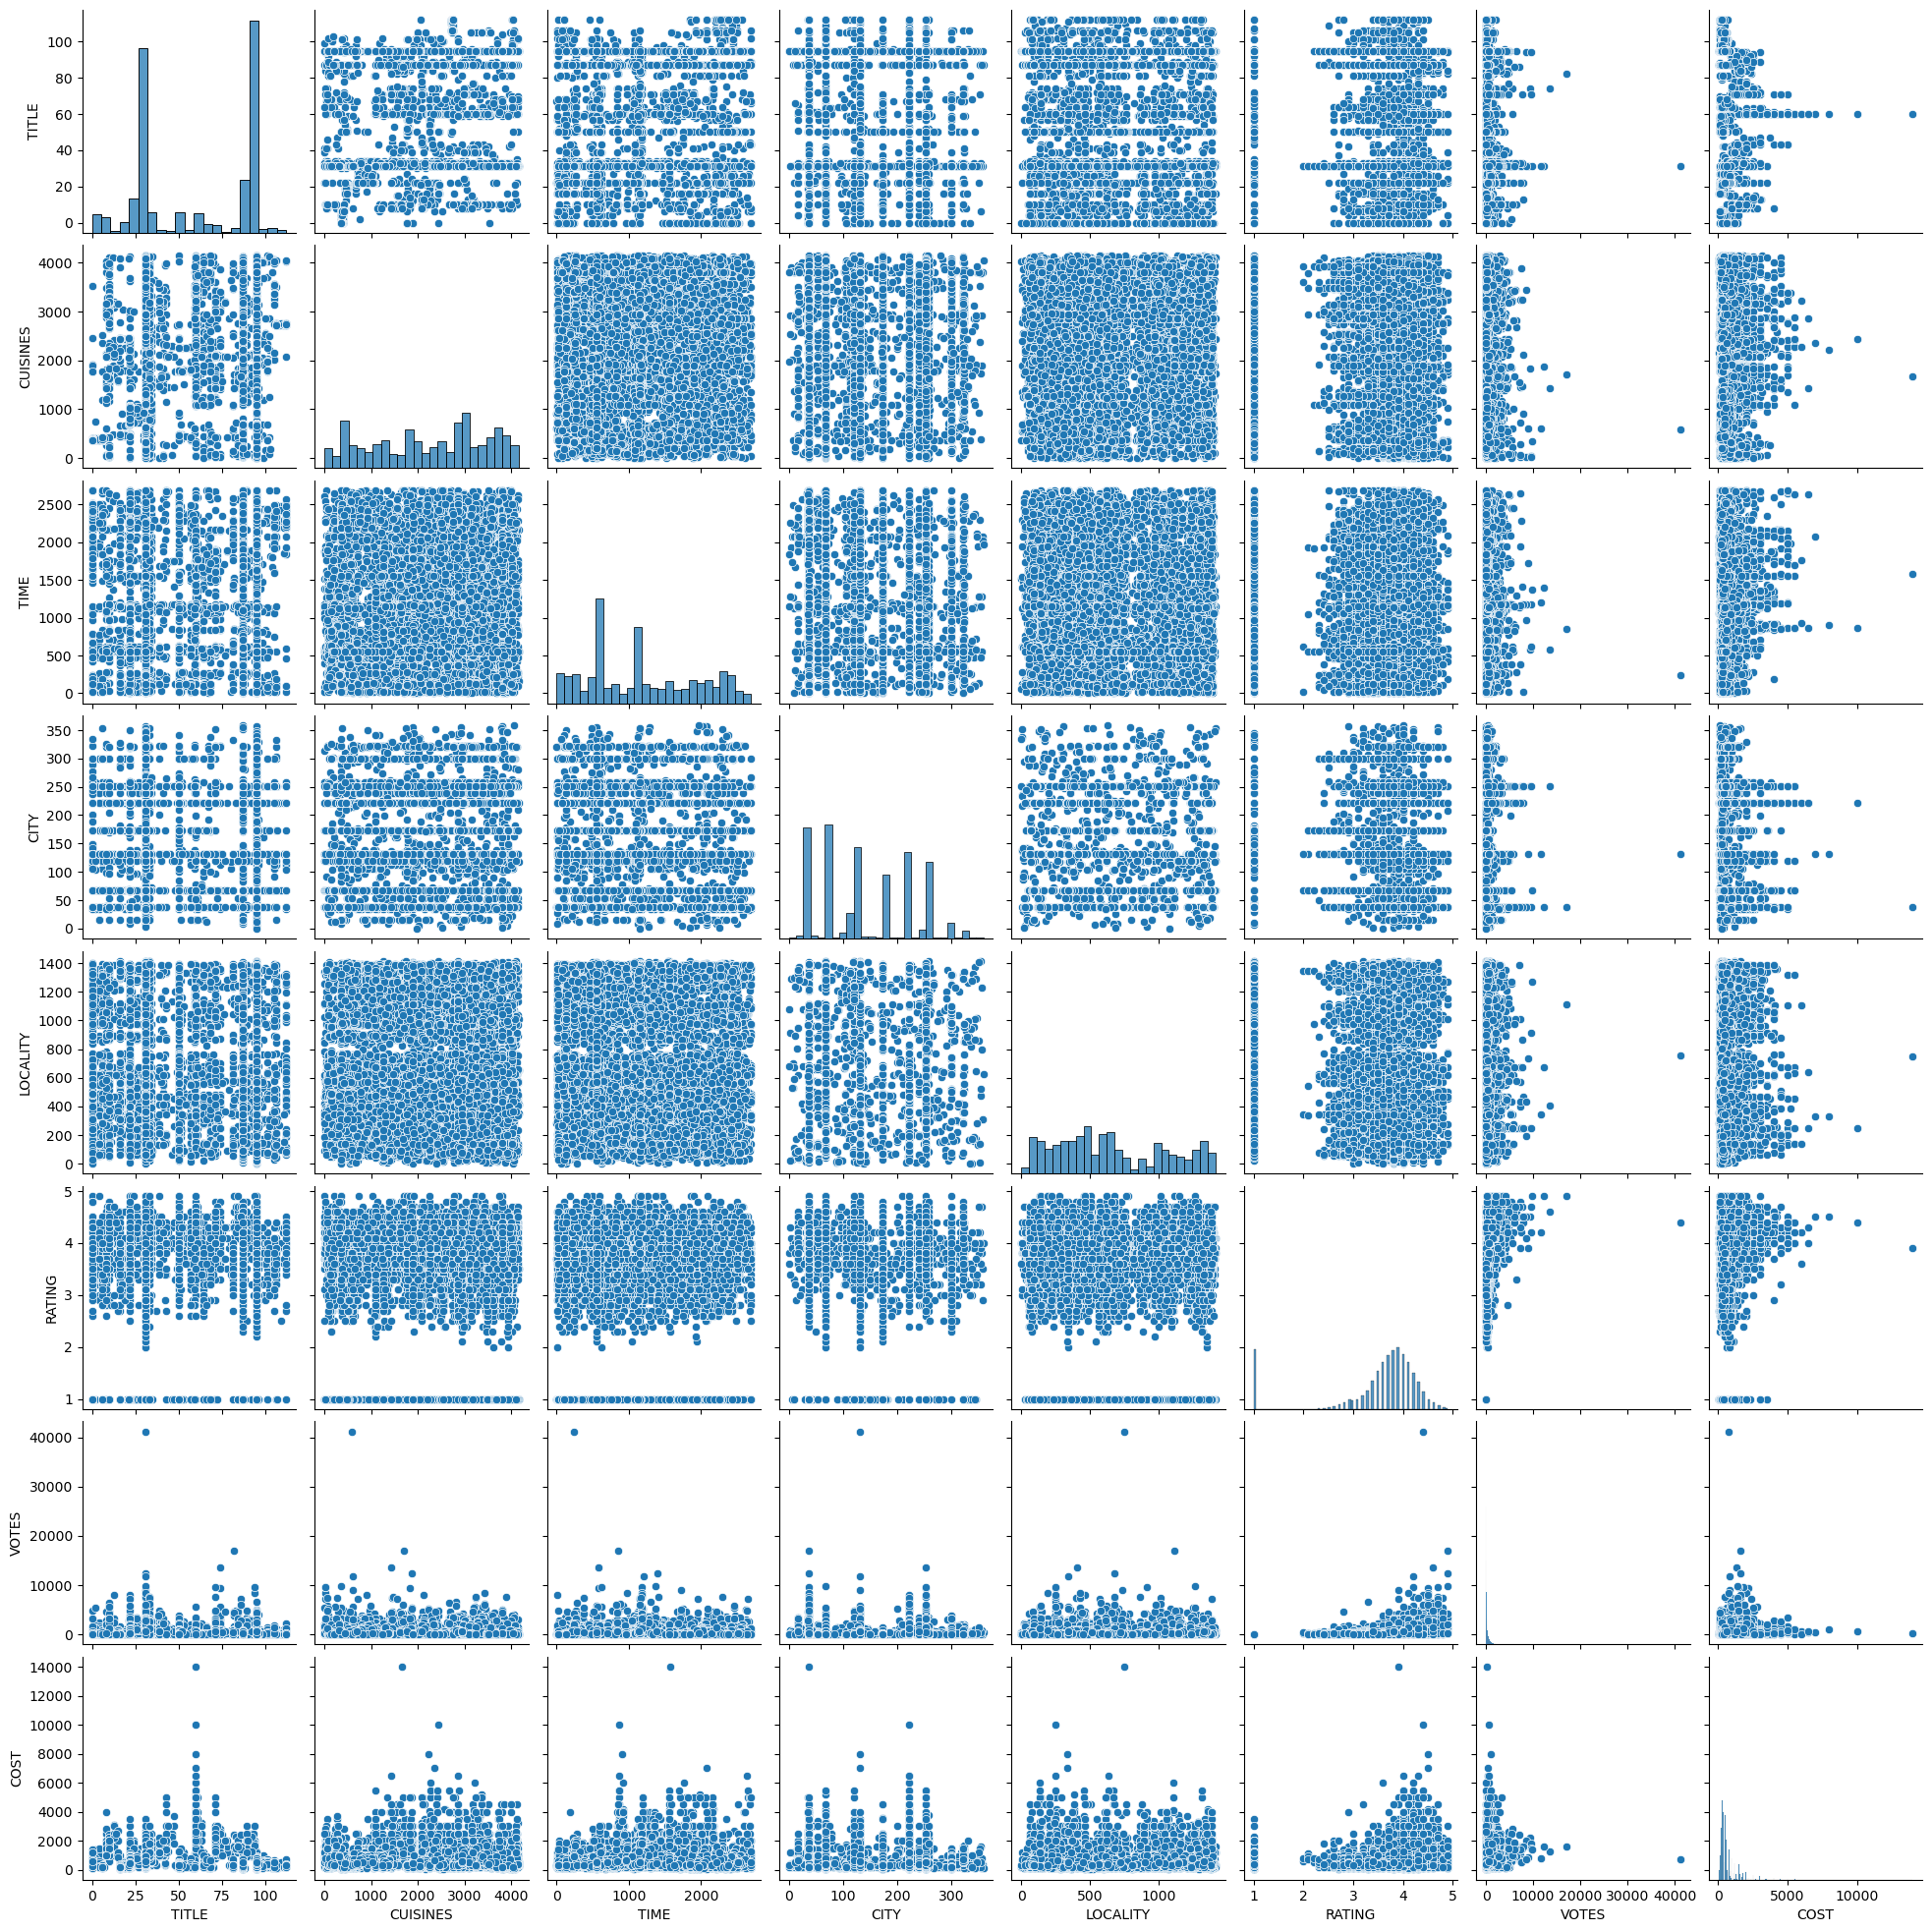

In [71]:
sns.pairplot(train_df)

From the above plots cost shows directly proportion relationship with rating and there is outliers pesent in the dataset  

# Checking for Outliers

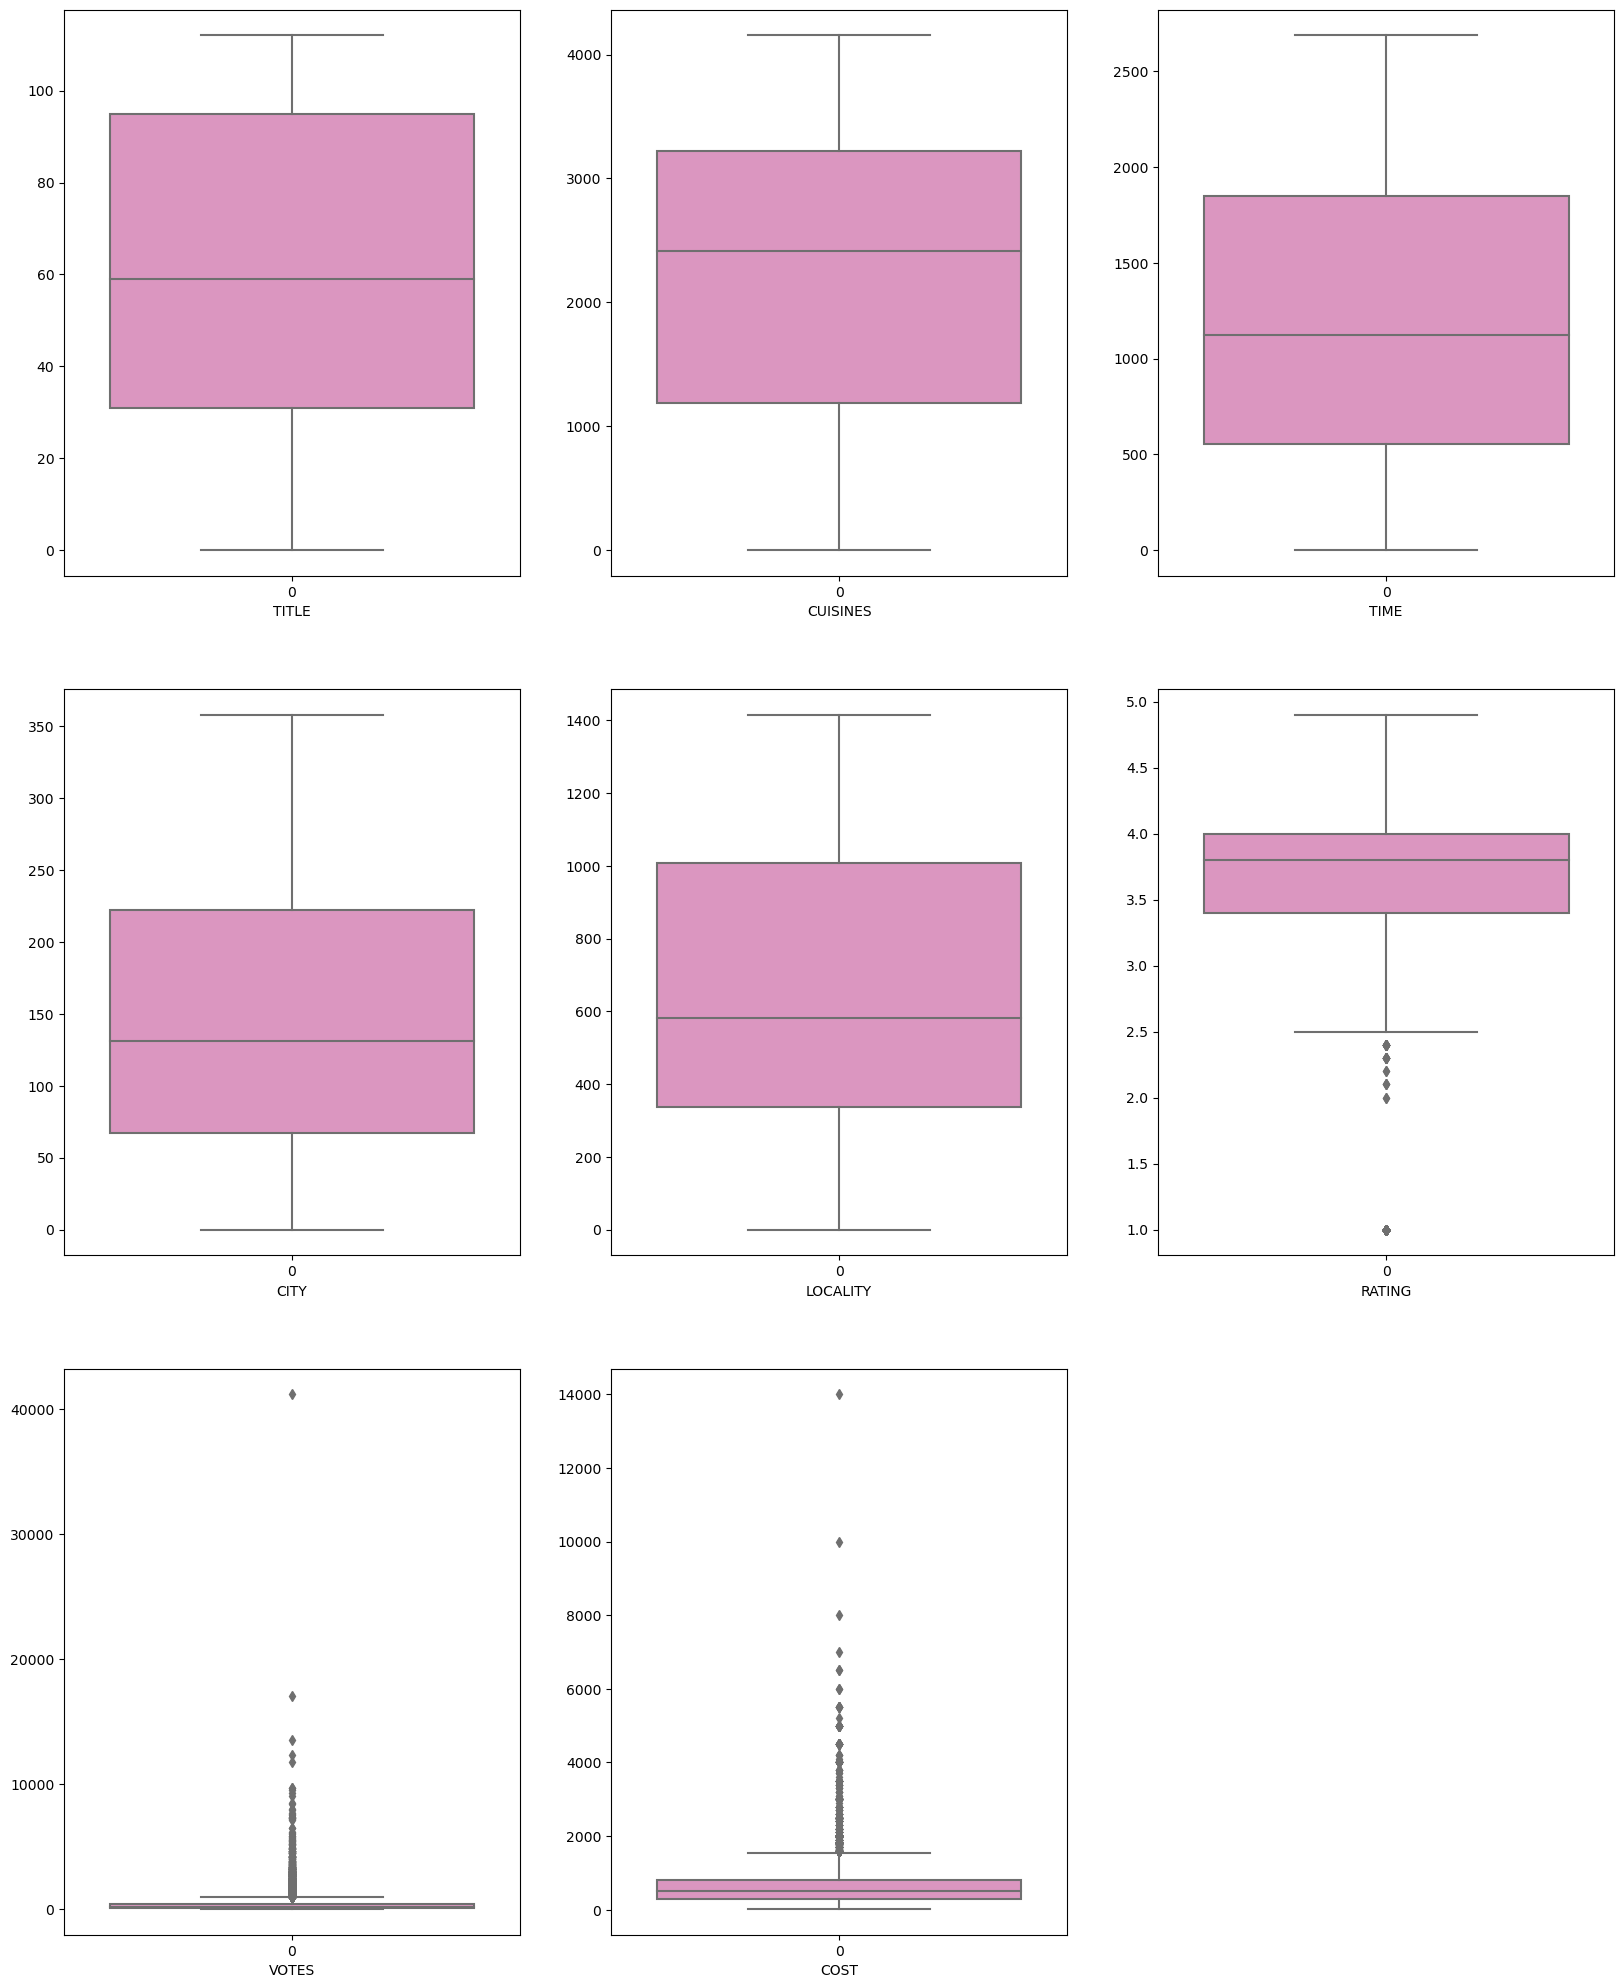

In [72]:
#Checking for Outliers using boxplot
plt.figure(figsize=(20,25))
p=1
for i in train_df.columns:
    if p<=8:
        plt.subplot(3,3,p)
        sns.boxplot(train_df[i],palette = "Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

In [73]:
from scipy.stats import zscore
up_score=train_df.iloc[:,:]
z=np.abs(zscore(up_score))
z

TITLE  CUISINES      TIME      CITY  LOCALITY    RATING     VOTES  \
0      0.868887  0.325408  0.584658  2.117762  0.920549  0.086271  0.409609   
1      0.807839  1.616381  0.934369  0.897082  0.986239  0.746237  0.433092   
2      0.868887  0.615265  0.688048  0.897082  1.124048  0.306259  0.197021   
3      1.084647  1.573701  1.199692  0.949957  1.293888  0.636243  0.440508   
4      0.288931  0.389682  0.749021  0.949957  0.081161  0.306259  0.266236   
...         ...       ...       ...       ...       ...       ...       ...   
12685  1.084647  0.580382  0.047829  0.134433  0.777728  0.306259  0.204670   
12686  0.807839  0.076570  0.004088  0.949957  1.301405  0.856232  1.030301   
12687  0.352072  0.122250  0.057108  1.152535  1.727906  0.526248  0.281301   
12688  0.868887  1.055448  0.870745  0.897082  0.053599  0.023724  0.430620   
12689  0.868887  0.590349  0.457410  0.134433  1.705355  0.133718  0.366583   

           COST  
0      0.868846  
1      1.347331  
2      0.230865  
3      0.230865  
4      0.566610  
...         ...  
12685  0.247620  
12686  1.825816  
12687  1.028341  
12688  0.407115  
12689  0.088125  

[12690 rows x 8 columns]

In [74]:
up_score=test_df.iloc[:,:]
z1=np.abs(zscore(up_score))
z1

TITLE  CUISINES      TIME      CITY  LOCALITY    RATING     VOTES
0     0.862742  0.731565  0.059086  1.336371  1.186360  0.856736  0.217962
1     1.106503  1.411712  1.203765  0.974641  0.691337  0.747118  0.410340
2     0.862742  1.056591  0.893156  0.974641  0.117648  0.308646  0.049347
3     0.765672  1.445308  1.609053  0.446444  0.309250  0.308646  1.318427
4     1.106503  1.421744  0.925461  0.509558  0.354970  0.089410  0.457806
...        ...       ...       ...       ...       ...       ...       ...
4226  0.862742  0.996401  1.233832  1.284696  0.909602  0.418264  0.128041
4227  0.765672  1.326935  0.766871  1.273257  0.623212  0.856736  0.099297
4228  1.106503  0.500325  1.553252  0.446444  1.331126  0.199028  0.420332
4229  1.106503  1.229136  0.904903  0.509558  0.218720  2.760661  0.479041
4230  1.106503  0.434627  0.757362  1.299095  0.837219  0.199028  0.407841

[4231 rows x 7 columns]

In [75]:
#threshold Z>3

np.where(z>3)

(array([   84,   186,   196,   208,   293,   303,   304,   308,   337,
          344,   354,   379,   422,   431,   469,   502,   510,   563,
          731,   775,   796,   839,   852,   855,   872,   913,   966,
          967,   973,  1034,  1038,  1132,  1133,  1147,  1151,  1193,
         1244,  1288,  1345,  1346,  1395,  1467,  1470,  1475,  1476,
         1522,  1540,  1594,  1617,  1632,  1657,  1681,  1685,  1759,
         1778,  1828,  1850,  1878,  1884,  1916,  1930,  1931,  2090,
         2100,  2111,  2204,  2205,  2207,  2268,  2302,  2305,  2333,
         2339,  2349,  2369,  2412,  2459,  2488,  2531,  2604,  2610,
         2622,  2683,  2686,  2689,  2695,  2740,  2886,  2905,  2940,
         2973,  2977,  3002,  3028,  3033,  3036,  3049,  3197,  3211,
         3289,  3309,  3333,  3338,  3396,  3398,  3408,  3492,  3507,
         3526,  3532,  3554,  3578,  3587,  3603,  3688,  3692,  3704,
         3706,  3715,  3728,  3730,  3773,  3841,  3847,  3855,  3877,
      

In [76]:
z.iloc[84,7]

4.537230920101538

In [77]:
#threshold Z>3

np.where(z1>3)

(array([  31,   83,   86,   92,  282,  377,  479,  534,  730,  759,  763,
         804,  806,  880,  987, 1093, 1098, 1111, 1147, 1156, 1314, 1324,
        1692, 1751, 1789, 1870, 1998, 2019, 2093, 2130, 2140, 2194, 2215,
        2304, 2326, 2355, 2363, 2415, 2486, 2639, 2641, 2657, 2697, 2749,
        2771, 2798, 2834, 2843, 2850, 2911, 2940, 2962, 3015, 3041, 3129,
        3209, 3279, 3317, 3442, 3443, 3501, 3520, 3683, 3703, 3728, 3734,
        3950, 4006, 4047, 4067, 4119, 4124, 4151, 4163], dtype=int64),
 array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6], dtype=int64))

In [78]:
z1.iloc[31,6]

4.401228453758874

In [79]:
train=train_df[(z<3).all(axis=1)]

In [80]:
train.shape

(12267, 8)

In [81]:
print("The size of New datset ",train.shape[0])

The size of New datset  12267


In [82]:
print("The size of datset with outlier ",train_df.shape[0])

The size of datset with outlier  12690


In [83]:
print("Data loss percentage",((train_df.shape[0]-train.shape[0])/train.shape[0])*100)

Data loss percentage 3.4482758620689653


In [84]:
test=test_df[(z1<3).all(axis=1)]

In [85]:
test.shape

(4157, 7)

In [86]:
test_df.shape

(4231, 7)

In [87]:
# Checking for Skewness


In [88]:
train.skew()

TITLE      -0.081885
CUISINES   -0.216513
TIME        0.318396
CITY        0.282131
LOCALITY    0.350438
RATING     -1.857808
VOTES       2.607065
COST        1.822529
dtype: float64

In [89]:
test.skew()

TITLE      -0.035717
CUISINES   -0.208632
TIME        0.315237
CITY        0.088697
LOCALITY    0.310100
RATING     -1.845030
VOTES       2.512263
dtype: float64

Small skewness present in votes apply log function

In [90]:
train["VOTES"]=np.cbrt(train["VOTES"])
test["VOTES"]=np.cbrt(test["VOTES"])
train["RATING"]=np.log(train["RATING"])
test["RATING"]=np.log(test["RATING"])


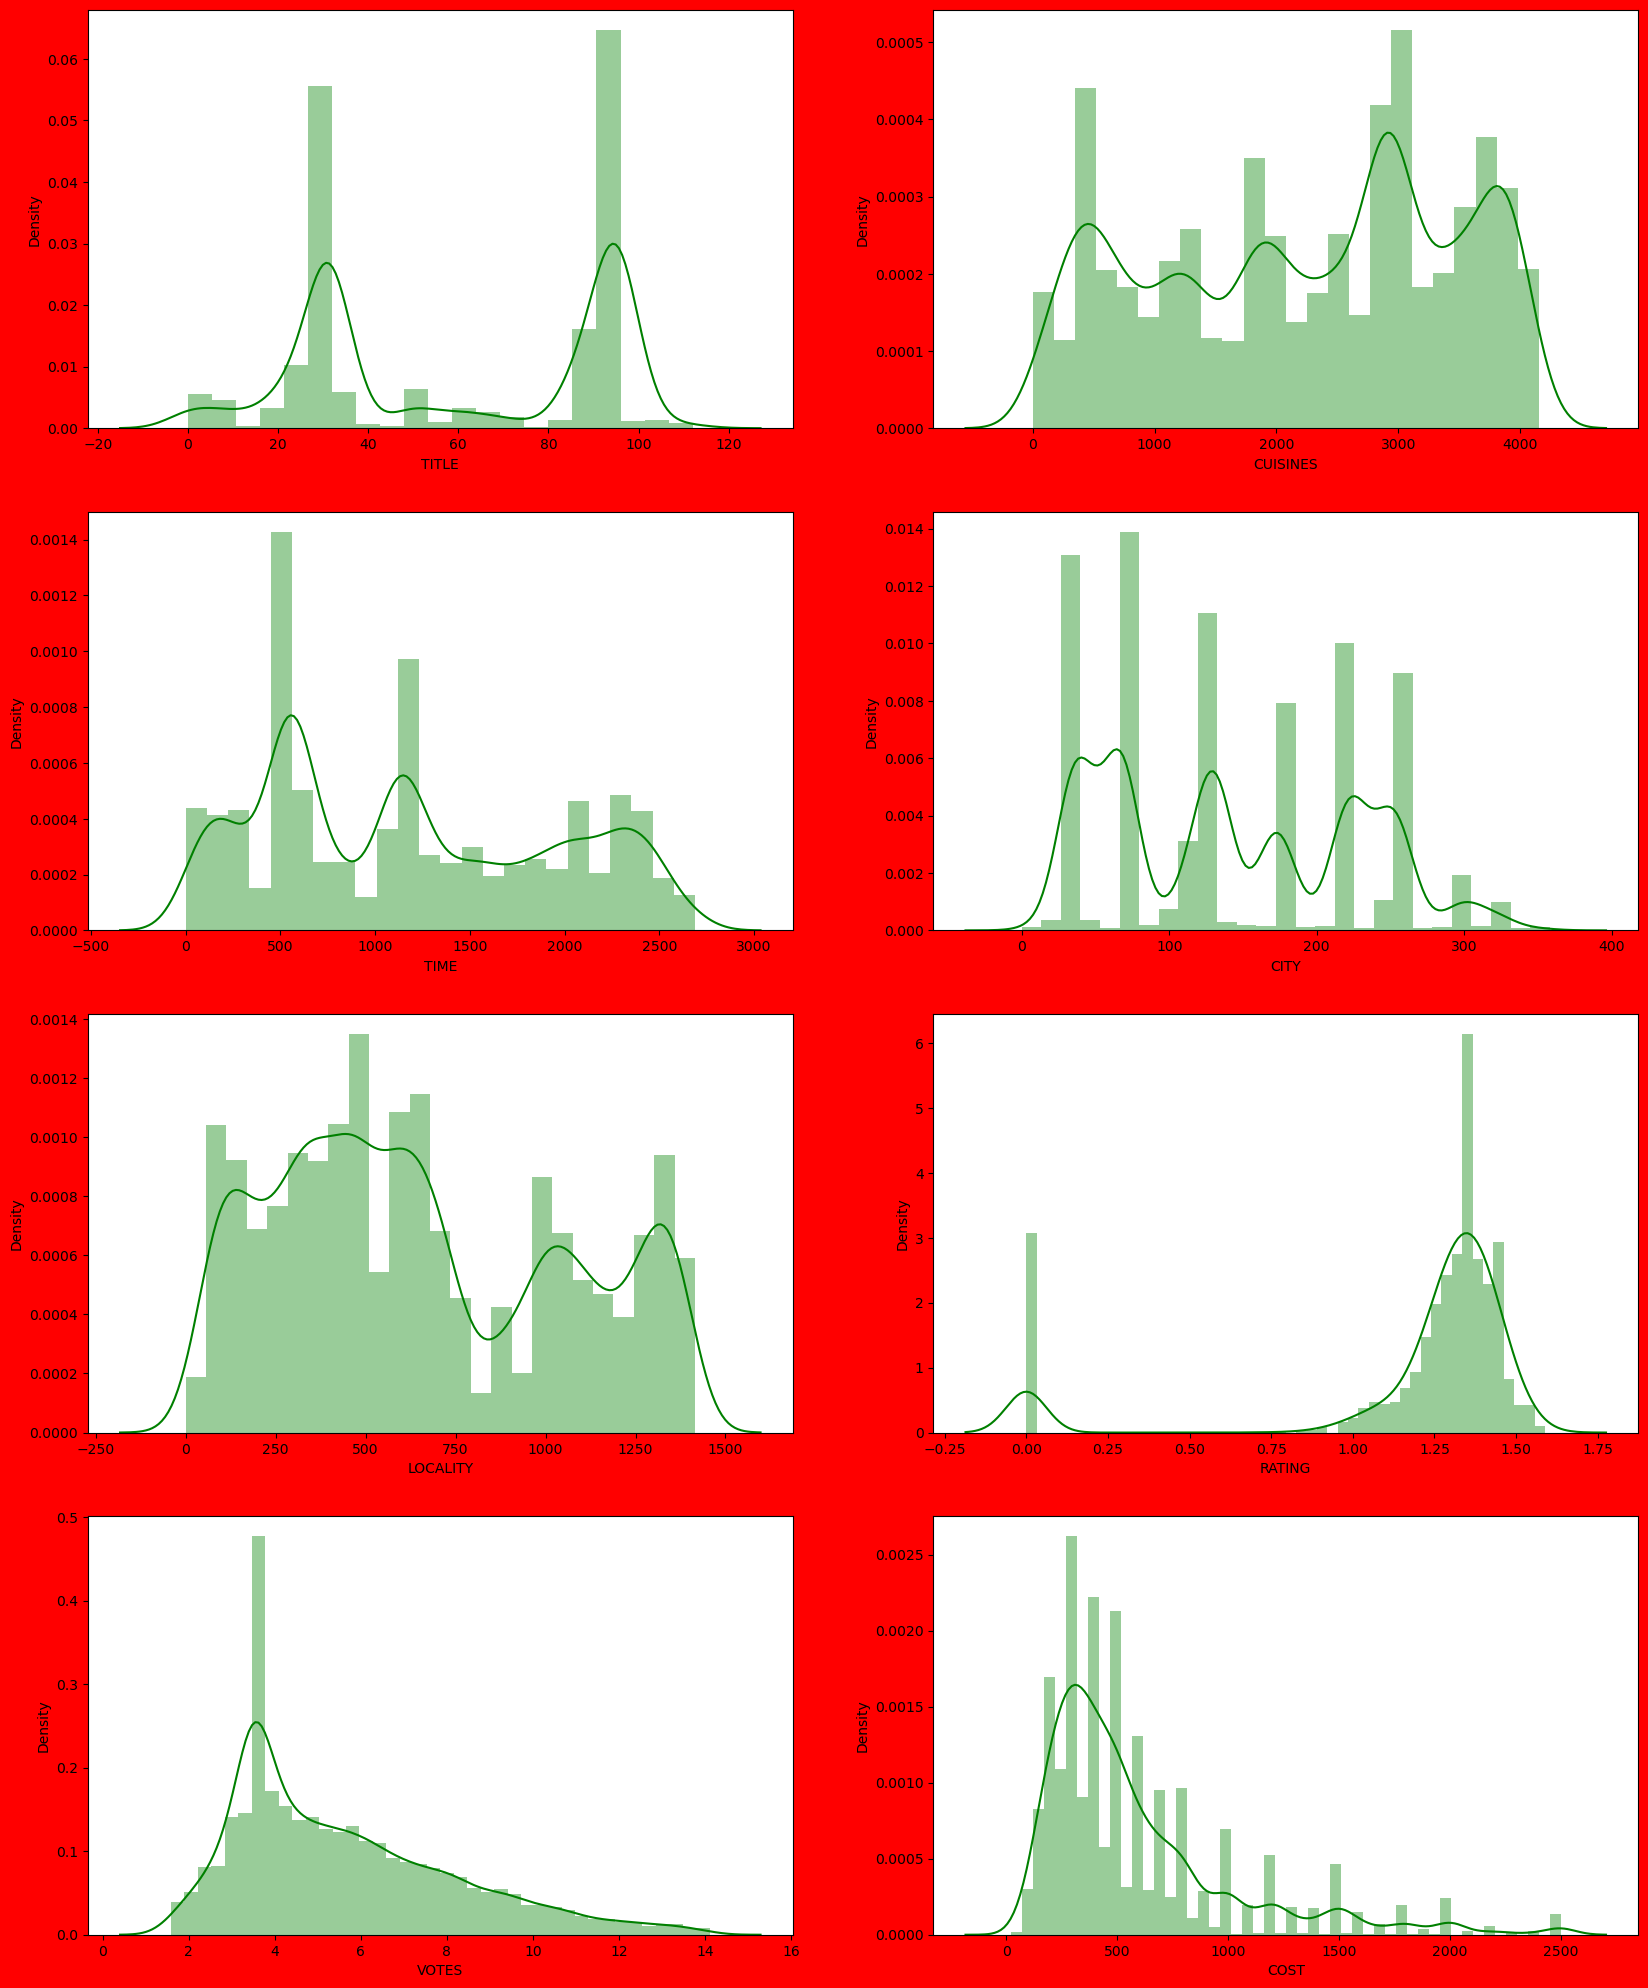

In [91]:
plt.figure(figsize=(20,25),facecolor="red")
plotnumber=1

for column in train:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.distplot(train[column],color='green')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [92]:
#Converting the datatype of Date Column form object to datetime format



In [93]:
train.skew()

TITLE      -0.081885
CUISINES   -0.216513
TIME        0.318396
CITY        0.282131
LOCALITY    0.350438
RATING     -2.365116
VOTES       0.916678
COST        1.822529
dtype: float64

In [94]:
test.skew()

TITLE      -0.035717
CUISINES   -0.208632
TIME        0.315237
CITY        0.088697
LOCALITY    0.310100
RATING     -2.370326
VOTES       0.649233
dtype: float64

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12267 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12267 non-null  int32  
 1   CUISINES  12267 non-null  int32  
 2   TIME      12267 non-null  int32  
 3   CITY      12267 non-null  int32  
 4   LOCALITY  12267 non-null  int32  
 5   RATING    12267 non-null  float64
 6   VOTES     12267 non-null  float64
 7   COST      12267 non-null  int64  
dtypes: float64(2), int32(5), int64(1)
memory usage: 622.9 KB


In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4157 entries, 0 to 4230
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     4157 non-null   int32  
 1   CUISINES  4157 non-null   int32  
 2   TIME      4157 non-null   int32  
 3   CITY      4157 non-null   int32  
 4   LOCALITY  4157 non-null   int32  
 5   RATING    4157 non-null   float64
 6   VOTES     4157 non-null   float64
dtypes: float64(2), int32(5)
memory usage: 178.6 KB


# correlation between target variable and independent variables

# Multicollinearity

In [97]:
cor=train.corr()

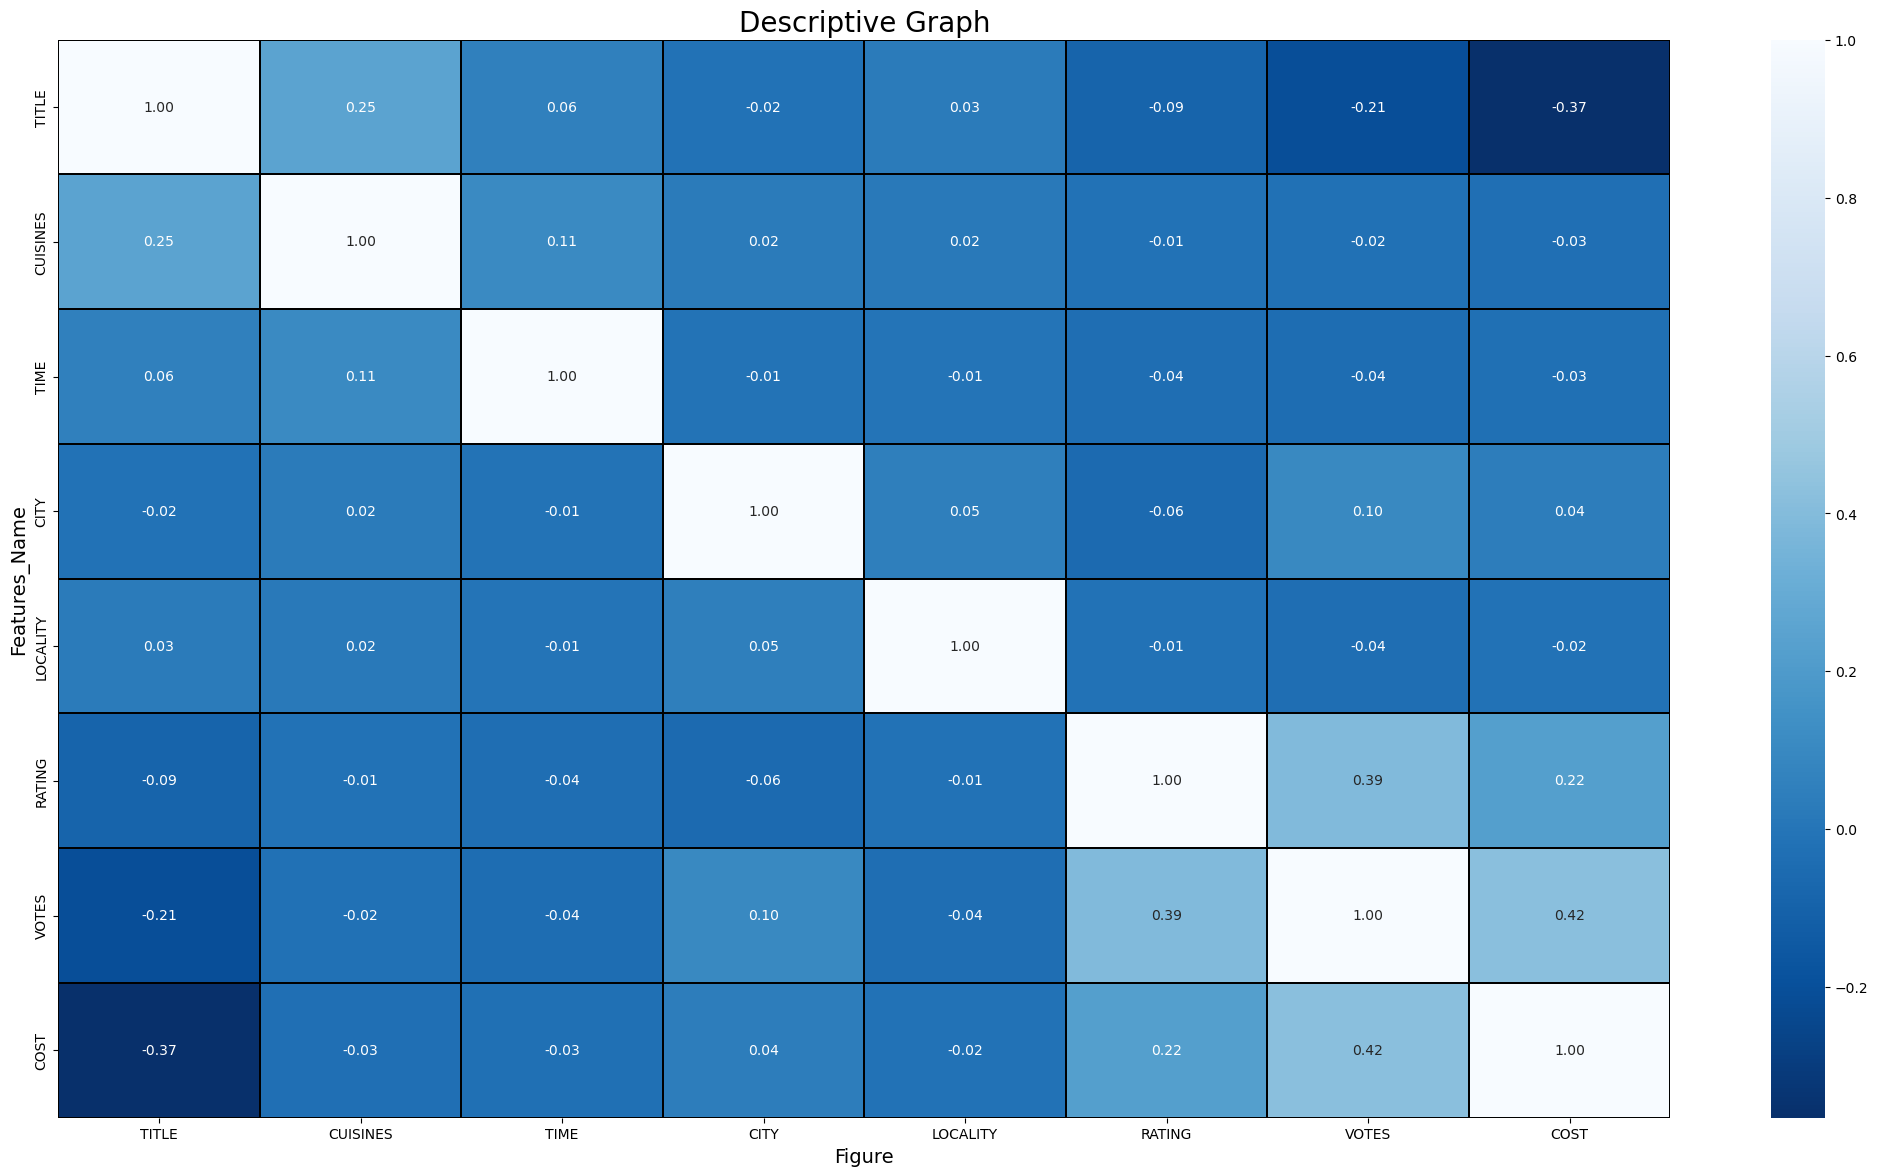

In [98]:
#Visualizing the correlation marix by using  heatmap

plt.figure(figsize=(26,14))
sns.heatmap(cor,annot=True,fmt="0.2f",linewidth = 0.2,linecolor="black", cmap="Blues_r")
plt.xlabel("Figure",fontsize=14)
plt.ylabel("Features_Name", fontsize=14)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

0 - no relation,0.3 to +0.3 less corelation, greater thab -0.5 to +0.5 moderate corelation, greater than -0.7 to +0.7 is high correlation

In [99]:
cor['COST'].sort_values(ascending=False)

COST        1.000000
VOTES       0.423733
RATING      0.221628
CITY        0.037580
LOCALITY   -0.015283
TIME       -0.029434
CUISINES   -0.031680
TITLE      -0.365501
Name: COST, dtype: float64

In [100]:
cor1=test.corr()

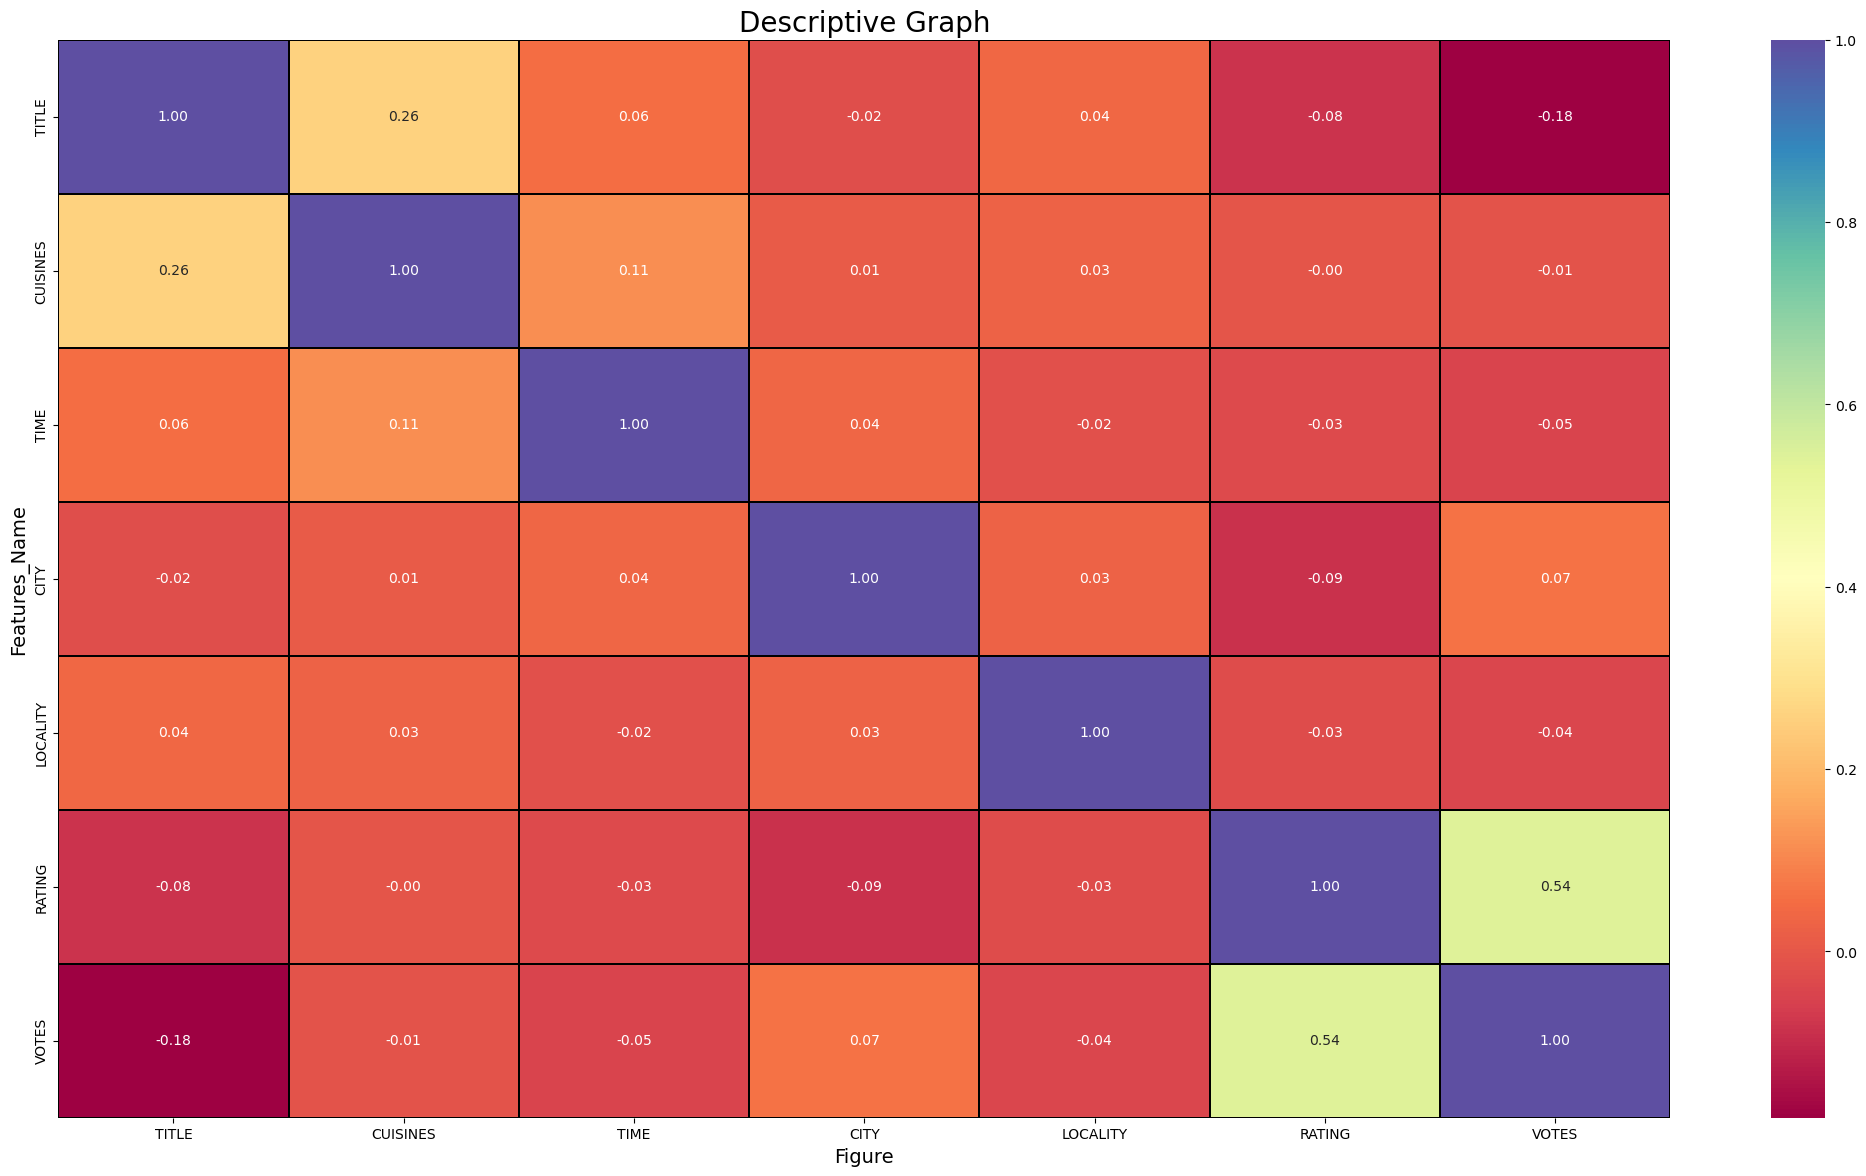

In [101]:
#Visualizing the correlation marix by using  heatmap

plt.figure(figsize=(26,14))
sns.heatmap(cor1,annot=True,fmt="0.2f",linewidth = 0.2,linecolor="black", cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.ylabel("Features_Name", fontsize=14)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

In [102]:
cor1['VOTES'].sort_values(ascending=False)


VOTES       1.000000
RATING      0.538435
CITY        0.065199
CUISINES   -0.009759
LOCALITY   -0.039381
TIME       -0.047053
TITLE      -0.182324
Name: VOTES, dtype: float64

# Visualizing the correlation between label and features using bar plot

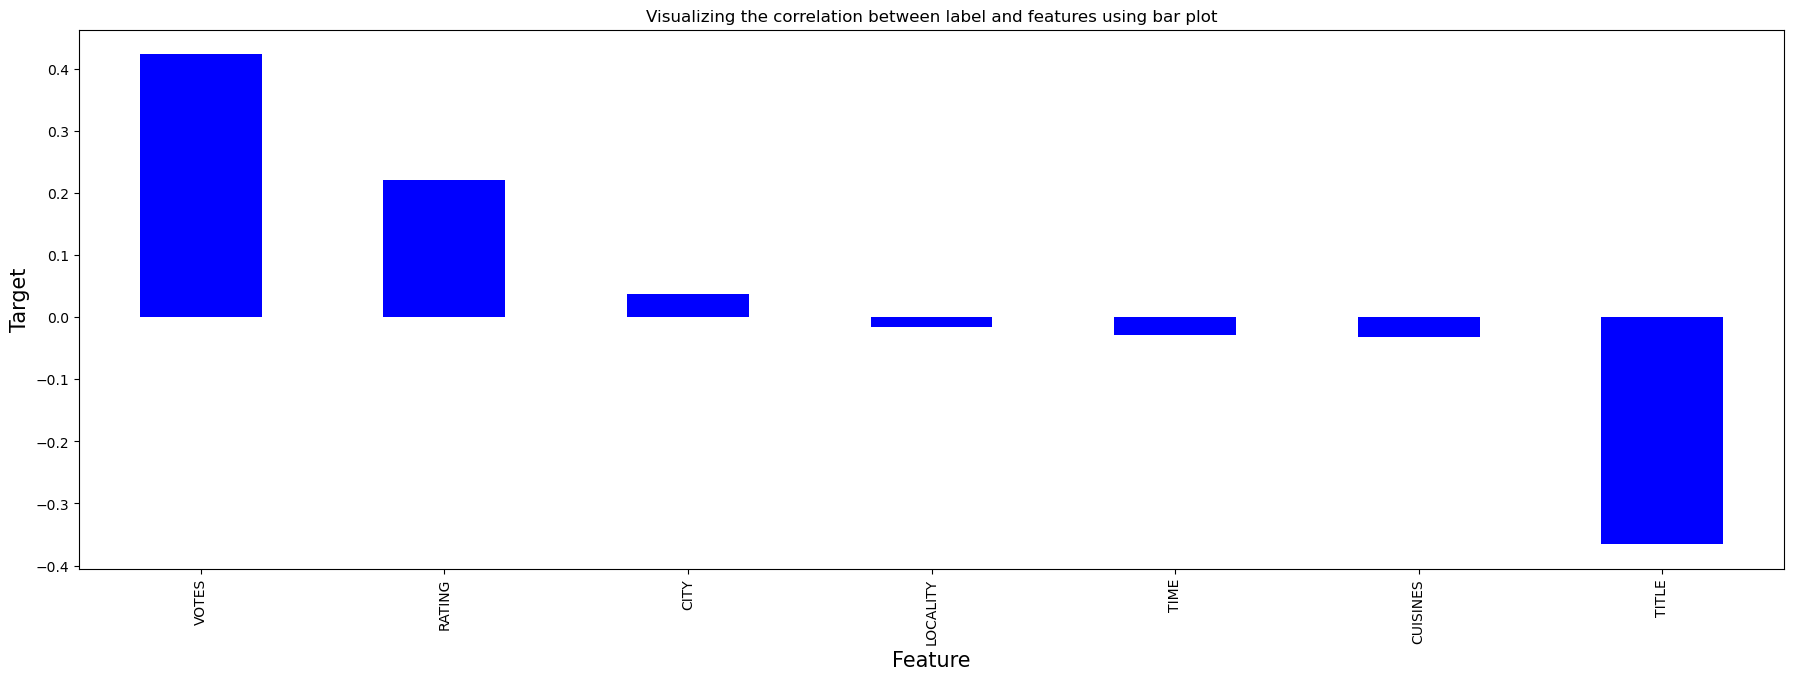

In [103]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(22,7))
cor["COST"].sort_values(ascending=False).drop(["COST"]).plot(kind='bar',color='b')
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Target",fontsize=15)
plt.title("Visualizing the correlation between label and features using bar plot")
plt.show()

# Separating features and label

In [104]:
x=train.iloc[:,0:7]
y=train.iloc[:,-1]

In [105]:
x

TITLE  CUISINES  TIME  CITY  LOCALITY    RATING      VOTES
0         31      2627   739   320       285  1.280934   3.659306
1         33       289  1885    67      1046  1.435085   3.107233
2         31      2976   661    67      1101  1.335001   6.045944
3         95      4130   275   222       136  1.410987   2.884499
4         50      1766   615   222       620  1.335001   5.484807
...      ...       ...   ...   ...       ...       ...        ...
12685     95      2934  1144   131       342  1.335001   8.173302
12686     33      2143  1177   222       133  1.458615  10.667752
12687     71      2088  1137   239      1342  1.386294   8.471647
12688     31      3506  1837    67       631  1.252763   3.174802
12689     31      2946   835   131      1333  1.223775   8.780708

[12267 rows x 7 columns]

In [106]:
y

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12267, dtype: int64

# Feature Scaling using Standard Scalarization

In [107]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

TITLE  CUISINES      TIME      CITY  LOCALITY    RATING     VOTES
0     -0.868661  0.324440 -0.572899  2.126584 -0.920062  0.220543 -0.759234
1     -0.808136 -1.609946  0.938713 -0.895507  0.984036  0.598868 -0.972278
2     -0.868661  0.613191 -0.675783 -0.895507  1.121652  0.353238  0.161766
3      1.068148  1.567973 -1.184930  0.955972 -1.292875  0.539726 -1.058231
4     -0.293671 -0.387924 -0.736459  0.955972 -0.081859  0.353238 -0.054776
...         ...       ...       ...       ...       ...       ...       ...
12262  1.068148  0.578442 -0.038690 -0.131025 -0.777443  0.353238  0.982711
12263 -0.808136 -0.076006  0.004838  0.955972 -1.300382  0.656617  1.945315
12264  0.341844 -0.121511 -0.047924  1.159037  1.724658  0.479124  1.097842
12265 -0.868661  1.051696  0.875399 -0.895507 -0.054336  0.151405 -0.946203
12266 -0.868661  0.588370 -0.446272 -0.131025  1.702139  0.080262  1.217108

[12267 rows x 7 columns]

In [108]:
test=pd.DataFrame(scaler.fit_transform(test),columns=test.columns)

# Checking Variance Inflation Factor(VIF)

In [109]:
# Finding variance inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

VIF values  Features
0    1.114825     TITLE
1    1.077440  CUISINES
2    1.014206      TIME
3    1.026100      CITY
4    1.005030  LOCALITY
5    1.190938    RATING
6    1.243903     VOTES

In [110]:
# Finding variance inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1["VIF values"]=[variance_inflation_factor(test.values, i) for i in range(len(test.columns))]
vif1["Features"]=test.columns

vif1

VIF values  Features
0    1.110960     TITLE
1    1.084738  CUISINES
2    1.017799      TIME
3    1.029594      CITY
4    1.004694  LOCALITY
5    1.440133    RATING
6    1.477135     VOTES

All feature are approx equal to each other so table is ideal for further analysis As we have limited independent variable this step can also be used when big data is present to drop features which are giving high VIF to maintain variance inflation 

In [111]:
y.value_counts()

300     1593
400     1349
500     1295
200     1029
600      796
250      665
800      589
700      580
350      550
150      488
1000     424
450      352
1200     319
1500     282
550      190
100      182
650      179
900      173
750      149
2000     148
1100     120
1800     117
1300     110
1400     105
1600      90
2500      82
850       65
1700      44
2200      33
950       29
1900      22
2100      15
2400      15
120       14
2300       9
50         8
1250       7
1350       6
1550       5
1150       5
1750       4
180        4
1850       4
1650       3
1450       2
1050       2
130        2
60         2
313        1
20         1
80         1
140        1
599        1
299        1
370        1
1950       1
320        1
1260       1
70         1
Name: COST, dtype: int64

Here we can observe that the data for target column is not balanced or biasness is present

In [118]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x1,y1=ros.fit_resample(x,y)

In [119]:
y1.value_counts()

1200    1593
1050    1593
1750    1593
1350    1593
60      1593
2200    1593
80      1593
1450    1593
120     1593
2400    1593
1700    1593
1550    1593
1150    1593
130     1593
313     1593
50      1593
2300    1593
1250    1593
20      1593
1650    1593
1850    1593
140     1593
599     1593
299     1593
370     1593
1950    1593
320     1593
1260    1593
1900    1593
550     1593
1500    1593
1000    1593
800     1593
300     1593
600     1593
1600    1593
200     1593
900     1593
400     1593
1400    1593
350     1593
500     1593
450     1593
700     1593
250     1593
2100    1593
2000    1593
1100    1593
100     1593
850     1593
2500    1593
1800    1593
150     1593
650     1593
750     1593
950     1593
1300    1593
180     1593
70      1593
Name: COST, dtype: int64

# Modelling Training 

In [141]:
#Checking lr model fit on w/o RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3,random_state= i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predLR=LR.predict(x_test)
    acc=r2_score(y_test,predLR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu,"at random_state", maxRS)

Best accuracy is  0.2898623057184647 at random_state 124


In [143]:
#Checking lr model fit on w RandomOverSampler dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size = 0.3,random_state= i)
    LR1=LinearRegression()
    LR1.fit(x1_train,y1_train)
    predLR1=LR.predict(x1_test)
    acc=r2_score(y1_test,predLR1)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu,"at random_state", maxRS)

Best accuracy is  0.11313344047613305 at random_state 30


In [128]:
print("Mean absolute error",mean_absolute_error(y_test,predLR))
print("Mean squared error",mean_squared_error(y_test,predLR))

print("Root mean squared error",np.sqrt(mean_squared_error(y_test,predLR)))

Mean absolute error 459.63675398338404
Mean squared error 340672.0549344784
Root mean squared error 583.6711873430779


In [144]:
print("Mean absolute error",mean_absolute_error(y1_test,predLR1))
print("Mean squared error",mean_squared_error(y1_test,predLR1))

print("Root mean squared error",np.sqrt(mean_squared_error(y1_test,predLR1)))

Mean absolute error 501.6650860054086
Mean squared error 463805.4175265564
Root mean squared error 681.0326112063624


In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=124)

In [136]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30,random_state=1)

As we can observe that model is better fit in dataset without random sampling  than the with random sampling techniques so using table w/o sampling for futher regression algorythms

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor

In [146]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print("R2_score:",r2_score(y_test,predLR))
print("R2 score on Training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predLR))
print("Mean Squared Error:",mean_squared_error(y_test,predLR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predLR)))

LinearRegression()
R2_score: 0.2643315303317697
R2 score on Training data: 26.685451537738526
Mean Absolute Error: 256.7838223581625
Mean Squared Error: 140293.88348618898
Root Mean Squared Error: 374.55825112549445


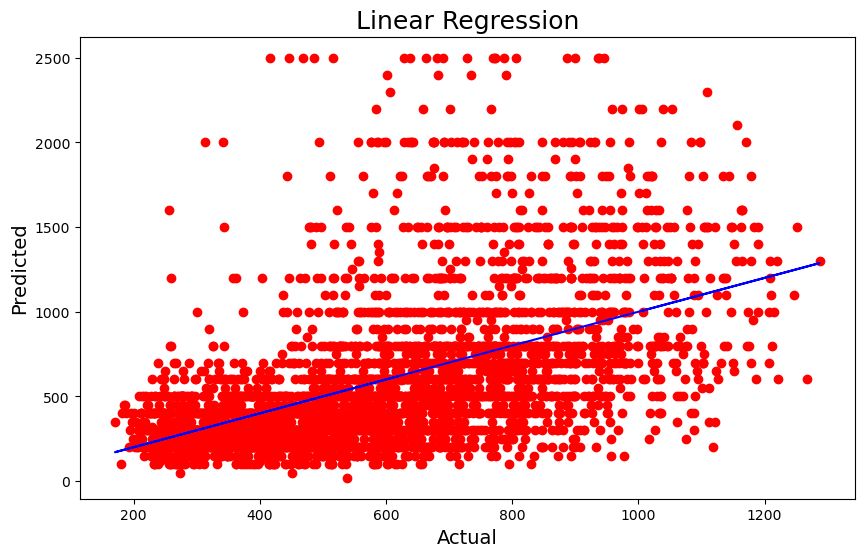

In [147]:
plt.figure(figsize=(10,6))
plt.scatter(x=predLR,y=y_test,color="r")
plt.plot(predLR,predLR,color="b")
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [148]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print("R2_score:",r2_score(y_test,predRFR))
print("R2 score on Training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predRFR))
print("Mean Squared Error:",mean_squared_error(y_test,predRFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predRFR)))

RandomForestRegressor()
R2_score: 0.6802788844152223
R2 score on Training data: 95.56801964477708
Mean Absolute Error: 169.0432894141085
Mean Squared Error: 60971.64522784796
Root Mean Squared Error: 246.9243714740365


In [173]:
# random forest regressor on the other dataset which has random over sampler
RFR1= RandomForestRegressor()
RFR1.fit(x1_train, y1_train)
predRFR1 =RFR1.predict(x1_test)
mse= mean_squared_error(y1_test, predRFR1)
print("Random Forest Regression Mean Squared Error:", mse)
print(r2_score(y1_test,predRFR1))

Random Forest Regression Mean Squared Error: 3567.744965498859
0.9931067526936538


In [149]:
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predtrain=knn.predict(x_train)
print(knn)
print("R2_score:",r2_score(y_test,predknn))
print("R2 score on Training data:",r2_score(y_train,predtrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predknn))
print("Mean Squared Error:",mean_squared_error(y_test,predknn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predknn)))

KNeighborsRegressor()
R2_score: 0.3630773044933947
R2 score on Training data: 60.584318842683274
Mean Absolute Error: 230.92094539527304
Mean Squared Error: 121462.80847595762
Root Mean Squared Error: 348.5151481298304


In [152]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predGBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR)
print("R2_score:",r2_score(y_test,predGBR))
print("R2 score on Training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predGBR))
print("Mean Squared Error:",mean_squared_error(y_test,predGBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predGBR)))

GradientBoostingRegressor()
R2_score: 0.6583692784967665
R2 score on Training data: 69.54785514710889
Mean Absolute Error: 175.8537232636358
Mean Squared Error: 65149.86385034562
Root Mean Squared Error: 255.24471365798277


In [153]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predlasso=lasso.predict(x_test)
predtrain=lasso.predict(x_train)
print(lasso)
print("R2_score:",r2_score(y_test,predlasso))
print("R2 score on Training data:",r2_score(y_train,predtrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predlasso))
print("Mean Squared Error:",mean_squared_error(y_test,predlasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predlasso)))

Lasso()
R2_score: 0.26452202523310864
R2 score on Training data: 26.682651175291973
Mean Absolute Error: 256.61997319787116
Mean Squared Error: 140257.55561487866
Root Mean Squared Error: 374.50975369792263


In [154]:
rd=Ridge()
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
predtrain=rd.predict(x_train)
print(rd)
print("R2_score:",r2_score(y_test,predrd))
print("R2 score on Training data:",r2_score(y_train,predtrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predrd))
print("Mean Squared Error:",mean_squared_error(y_test,predrd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predrd)))

Ridge()
R2_score: 0.26433218117304313
R2 score on Training data: 26.68545127876515
Mean Absolute Error: 256.7828327965864
Mean Squared Error: 140293.75936907163
Root Mean Squared Error: 374.558085440792


In [155]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
predtrain=dtr.predict(x_train)
print(dtr)
print("R2_score:",r2_score(y_test,preddtr))
print("R2 score on Training data:",r2_score(y_train,predtrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y_test,preddtr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,preddtr)))

DecisionTreeRegressor()
R2_score: 0.37790315675073305
R2 score on Training data: 99.99732193932806
Mean Absolute Error: 231.7908177125781
Mean Squared Error: 118635.48003259984
Root Mean Squared Error: 344.4350156888812


In [156]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
predtrain=svr.predict(x_train)
print(svr)
print("R2_score:",r2_score(y_test,predsvr))
print("R2 score on Training data:",r2_score(y_train,predtrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y_test,predsvr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predsvr)))

SVR()
R2_score: 0.16617242043051084
R2 score on Training data: 16.170147511257493
Mean Absolute Error: 245.63086008962367
Mean Squared Error: 159013.08010175914
Root Mean Squared Error: 398.7644418723404


In [157]:
#Checking accuracy for ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
ET=ExtraTreesRegressor()
ET.fit(x_train,y_train)
predET= ET.predict(x_test)
predtrain=ET.predict(x_train)
print(ET)
print("R2_score:",r2_score(y_test,predET))
print("R2 score on Training data:",r2_score(y_train,predtrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predET))
print("Mean Squared Error:",mean_squared_error(y_test,predET))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predET)))


ExtraTreesRegressor()
R2_score: 0.6496044737126025
R2 score on Training data: 99.99717576064337
Mean Absolute Error: 177.35846780766096
Mean Squared Error: 66821.33483471883
Root Mean Squared Error: 258.49822984832764


In [158]:
#Checking accuracy for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)
predBR= BR.predict(x_test)
predtrain=BR.predict(x_train)
print(BR)
print("R2_score:",r2_score(y_test,predBR))
print("R2 score on Training data:",r2_score(y_train,predtrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predBR))
print("Mean Squared Error:",mean_squared_error(y_test,predBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predBR)))

BaggingRegressor()
R2_score: 0.6433093240966636
R2 score on Training data: 93.60263101294366
Mean Absolute Error: 177.89515077424613
Mean Squared Error: 68021.83617895197
Root Mean Squared Error: 260.80996180926826


In [174]:
BC1=BaggingRegressor()
BC1.fit(x1_train,y1_train)
predBC1= BC1.predict(x1_test)
print(mean_squared_error(y1_test,predBC1))
print(r2_score(y1_test,predBC1))

4298.645678048266
0.9916945779399342


In [159]:
#Checking accuracy for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
predABR= ABR.predict(x_test)
predtrain=ABR.predict(x_train)
print(ABR)
print("R2_score:",r2_score(y_test,predABR))
print("R2 score on Training data:",r2_score(y_train,predtrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predABR))
print("Mean Squared Error:",mean_squared_error(y_test,predABR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predABR)))

AdaBoostRegressor()
R2_score: 0.28521645759498204
R2 score on Training data: 34.54417291640747
Mean Absolute Error: 278.0696247306438
Mean Squared Error: 136311.073738472
Root Mean Squared Error: 369.2032959474658


# Spliting train test data using Cross validation score

In [160]:
from sklearn.model_selection import cross_val_score

In [161]:
#Checking cv score for Random Forest Regressor
score= cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("The difference between Accuracy score and Cross validation score: ",r2_score(y_test,predRFR)-score.mean())

[0.69803227 0.673009   0.66624958 0.67261144 0.7199445 ]
0.6859693575801128
The difference between Accuracy score and Cross validation score:  -0.005690473164890464


In [162]:
#Checking cv score for Extra Tree Regressor
score1= cross_val_score(ET,x,y)
print(score1)
print(score1.mean())
print("The difference between Accuracy score and Cross validation score: ",r2_score(y_test,predET)-score1.mean())

[0.68437627 0.65675133 0.66559562 0.65858949 0.6882299 ]
0.670708520981924
The difference between Accuracy score and Cross validation score:  -0.02110404726932147


In [164]:
#checking  CV for GBR
score2=cross_val_score(GBR,x,y)
print(score2)
print(score2.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,predGBR)-score2.mean())

[0.67436072 0.6516393  0.64676909 0.65920682 0.68044073]
0.6624833316596623
Difference between Accuracy score and Cross validation score is : -0.004114053162895814


In [163]:
#checking  CV for Decision Tree Regressor
score3=cross_val_score(dtr,x,y)
print(score3)
print(score3.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,preddtr)-score3.mean())

[0.39610197 0.36691543 0.37640422 0.39790139 0.44655579]
0.39677576249715585
Difference between Accuracy score and Cross validation score is : -0.0188726057464228


In [166]:
#checking  CV for Bagging Regressor
score4=cross_val_score(BR,x,y)
print(score4)
print(score4.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,predBR)-score4.mean())

[0.67299026 0.63896053 0.631544   0.63259883 0.68755771]
0.6527302680117091
Difference between Accuracy score and Cross validation score is : -0.009420943915045443


The best model perform on given dataset are Random forest and bagging as both model r2score is above and 65 and accuracy on x train split is 95% this is best stats among various modelling technique

There is one more finding that same bagging and random forest showing best result with x1 data set or with removing oversampling using randomsampler

# Hyper Parameter Tuning

In [167]:
from sklearn.model_selection import GridSearchCV

In [169]:
parameters = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]}

In [170]:
GCV= GridSearchCV(BaggingRegressor(),parameters, cv = 5)

In [171]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 50, 100]})

In [172]:
GCV.best_params_

{'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100}

In [ ]:
#Checking Bagging  Model with parameter tunning

In [179]:
best_model=BaggingRegressor(bootstrap= True, bootstrap_features= True,max_features= 1.0,max_samples= 1.0,n_estimators=100)
best_model.fit(x_train,y_train)
prediBR= best_model.predict(x_test)
predtrain=best_model.predict(x_train)
print(best_model)
print("R2_score:",r2_score(y_test,prediBR))
print("R2 score on Training data:",r2_score(y_train,predtrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,prediBR))
print("Mean Squared Error:",mean_squared_error(y_test,prediBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediBR)))

BaggingRegressor(bootstrap_features=True, n_estimators=100)
R2_score: 0.6881141896612057
R2 score on Training data: 95.60229400131975
Mean Absolute Error: 168.38519448935085
Mean Squared Error: 59477.43221399612
Root Mean Squared Error: 243.87995451450314


In [175]:
GCV1= GridSearchCV(BaggingRegressor(),parameters, cv = 5)

In [176]:
GCV1.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 50, 100]})

In [177]:
GCV1.best_params_

{'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100}

In [180]:
best_model1=BaggingRegressor(bootstrap =False, bootstrap_features= True, max_features= 1.0, max_samples= 1.0, n_estimators= 100)
best_model1.fit(x1_train,y1_train)
prediBR1= best_model1.predict(x1_test)
predtrain1=best_model1.predict(x1_train)
print(best_model)
print("R2_score:",r2_score(y1_test,prediBR1))
print("R2 score on Training data:",r2_score(y1_train,predtrain1)*100)
print("Mean Absolute Error:",mean_absolute_error(y1_test,prediBR1))
print("Mean Squared Error:",mean_squared_error(y1_test,prediBR1))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y1_test,prediBR1)))

BaggingRegressor(bootstrap_features=True, n_estimators=100)
R2_score: 0.9957082598756078
R2 score on Training data: 99.98573758596241
Mean Absolute Error: 12.42891872836168
Mean Squared Error: 2221.2802677096383
Root Mean Squared Error: 47.13046008378911


In [184]:
parameter1 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.1, 0.2]
    'max_features': ['auto', 'sqrt']}

In [185]:
GCV2= GridSearchCV(BaggingRegressor(),parameter1, cv = 5)

In [ ]:
#GCV2.fit(x1_train,y1_train)
#GCV2.best_params_

""""rfr_model=BaggingRegressor(n_estimators =50, max_depth= None, min_samples_split= 2, min_samples_leaf= 1,learning_rate=0.01, max_features= "auto")
rfr_model.fit(x1_train,y1_train)
predirfr= rfr_model.predict(x1_test)
rfr_train=rfr_model.predict(x1_train)
print(best_model)
print("R2_score:",r2_score(y1_test,prediBR1))
print("R2 score on Training data:",r2_score(y1_train,rfr_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y1_test,predirfr))
print("Mean Squared Error:",mean_squared_error(y1_test,predirfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y1_test,predirfr)))

# Saving the Model

In [181]:
#Saving ET model using pickle
import pickle
filename="Restro_cost_identifier.pkl"
pickle.dump(best_model1,open(filename,"wb")) 

In [182]:
load_model=pickle.load(open("Restro_cost_identifier.pkl","rb"))
result=load_model.score(x1_test,y1_test)
print(result*100)

99.57082598756078


In [183]:
conclusion =pd.DataFrame(load_model.predict(test))
conclusion

0
0     1056.857143
1      380.500000
2      717.000000
3      514.000000
4      506.000000
...           ...
4152   641.000000
4153  1230.875000
4154   353.742857
4155   514.858333
4156   457.000000

[4157 rows x 1 columns]